# New Section

https://medium.com/starschema-blog/transfer-learning-the-dos-and-donts-165729d66625

https://datascience.stackexchange.com/questions/47966/over-fitting-in-transfer-learning-with-small-dataset

# Data preparation

Dataset: https://tev.fbk.eu/technologies/smartwatch-gestures-dataset

Research Paper: https://www.eurasip.org/Proceedings/Eusipco/Eusipco2014/HTML/papers/1569922319.pdf

!unzip gestures-dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
print(tf.__version__)
from sklearn.model_selection import train_test_split


2.6.0


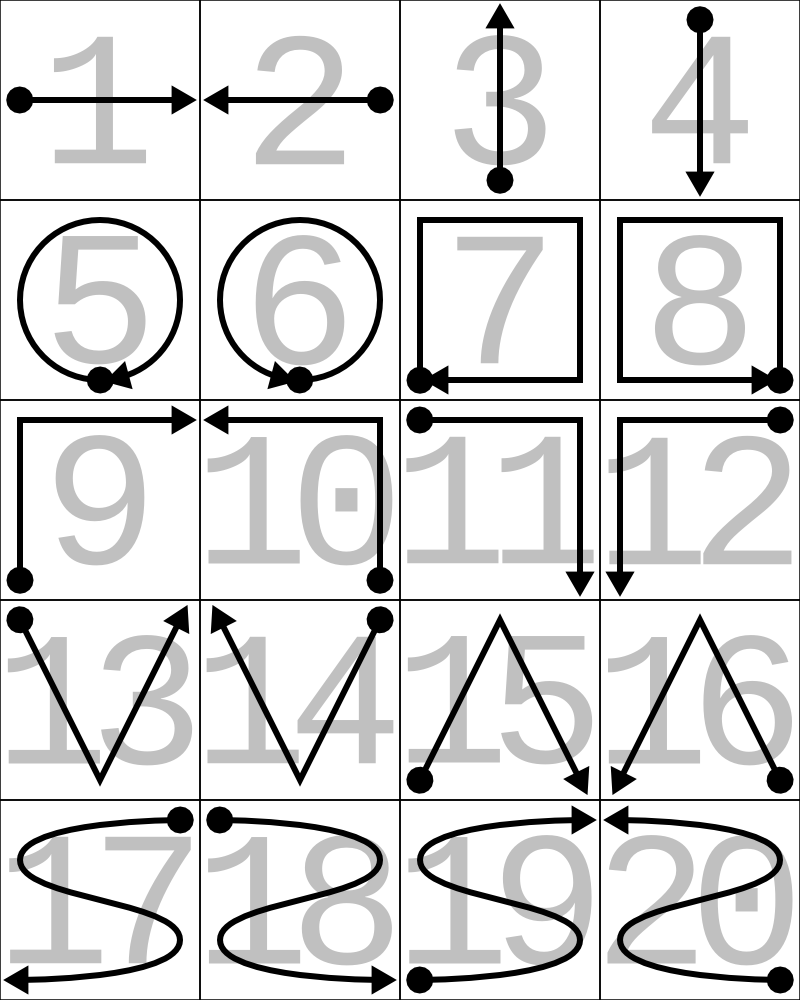

In [2]:
from IPython.display import Image
Image('gestures-dataset/gestures.png')

In [3]:
gestureTypeList = ['right', 'left', 'up', 'down', 'circle_C', 'circle_AC',
                     'square_C', 'square_AC', 'upRight', 'upLeft','RightDown', 'LeftDown', 'V', 'V_reverse', 
                     'V_mirror', 'V_mirrorR', 
                     'S_top', 'S_topM', 'S_down', 'S_downM']

def getDataSpecificFileEachUser(fileName, gestureType):
  column_names = ['timeMilliscond', 'timeNano', 'timestamp', 'x_axis', 'y_axis', 'z_axis']
  df_file = pd.read_csv(fileName, sep=' ', header=None, names=column_names)
  df_file["z_axis"] = pd.to_numeric(df_file["z_axis"], downcast="float")
  df_file["x_axis"] = pd.to_numeric(df_file["x_axis"], downcast="float")
  df_file["y_axis"] = pd.to_numeric(df_file["y_axis"], downcast="float")
  df_file["timestamp"] = pd.to_numeric(df_file["timestamp"], downcast="float")
  df_file["timeNano"] = pd.to_numeric(df_file["timeNano"], downcast="float")
  df_file["timeMilliscond"] = pd.to_numeric(df_file["timeMilliscond"], downcast="float")
  return df_file

def getAllDataForEachUser(userId):
  # R = reverse, C = Clockwise, M = Mirror
   
   gesturesSize = 20
   df_file = pd.DataFrame()
   for x in range(gesturesSize):
     #gestureName = "gesture" + str(x+1)
     gestureName = gestureTypeList[x] 
     
     fileName = ""
     if (x+1) < 10:
       folderName = "/0"+ str(x+1)
     else: 
       folderName = "/"+ str(x+1)  
     for y in range(20):  
       fileNameText = ""
       if (y+1) < 10:
         fileNameText = "/0"+ str(y+1)
       else: 
         fileNameText = "/"+ str(y+1) 
       filePath = 'gestures-dataset/U0' + str(userId) + folderName + fileNameText + ".txt"
       #print(filePath)
       df = getDataSpecificFileEachUser(filePath, gestureName)
       df['gesture']= gestureName
       df_file = df_file.append(df, ignore_index=True)
   df_file['userId']= userId
   
   return df_file
   

df = getAllDataForEachUser(1)  
df = df.append(getAllDataForEachUser(2)) 
df = df.append(getAllDataForEachUser(3)) 
df = df.append(getAllDataForEachUser(4)) 
df = df.append(getAllDataForEachUser(5)) 
df = df.append(getAllDataForEachUser(6)) 
df = df.append(getAllDataForEachUser(7)) 
df = df.append(getAllDataForEachUser(8)) 



  
  


# Gathering Dataset for 20 Gestures

gestureTypeList = ['right', 'left', 'up', 'down', 'circle_C', 'circle_AC',
                     'square_C', 'square_AC', 'upRight', 'upLeft','RightDown', 'LeftDown', 'V', 'V_reverse', 
                     'V_mirror', 'V_mirrorR', 
                     'S_top', 'S_topM', 'S_down', 'S_downM']

def getDataSpecificFileEachUser(fileName, gestureType):
  column_names = ['timeMilliscond', 'timeNano', 'timestamp', 'x_axis', 'y_axis', 'z_axis']
  df_file = pd.read_csv(fileName, sep=' ', header=None, names=column_names)
  df_file["z_axis"] = pd.to_numeric(df_file["z_axis"], downcast="float")
  df_file["x_axis"] = pd.to_numeric(df_file["x_axis"], downcast="float")
  df_file["y_axis"] = pd.to_numeric(df_file["y_axis"], downcast="float")
  df_file["timestamp"] = pd.to_numeric(df_file["timestamp"], downcast="float")
  df_file["timeNano"] = pd.to_numeric(df_file["timeNano"], downcast="float")
  df_file["timeMilliscond"] = pd.to_numeric(df_file["timeMilliscond"], downcast="float")
  return df_file

def getAllDataForEachUser(userId):
  # R = reverse, C = Clockwise, M = Mirror
   
   gesturesSize = 20
   df_file = pd.DataFrame()
   for x in range(gesturesSize):
     #gestureName = "gesture" + str(x+1)
     gestureName = gestureTypeList[x] 
     fileName = ""
     if (x+1) < 10:
       folderName = "/0"+ str(x+1)
     else: 
       folderName = "/"+ str(x+1)  
     for y in range(20):  
       fileNameText = ""
       if (y+1) < 10:
         fileNameText = "/0"+ str(y+1)
       else: 
         fileNameText = "/"+ str(y+1) 
       filePath = 'gestures-dataset/U0' + str(userId) + folderName + fileNameText + ".txt"
       #print(filePath)
       df = getDataSpecificFileEachUser(filePath, gestureName)
       df['gesture']= gestureName
       df_file = df_file.append(df, ignore_index=True)
   df_file['userId']= userId
   
   return df_file
   

df = getAllDataForEachUser(1)  
df = df.append(getAllDataForEachUser(2)) 
df = df.append(getAllDataForEachUser(3)) 
df = df.append(getAllDataForEachUser(4)) 
df = df.append(getAllDataForEachUser(5)) 
df = df.append(getAllDataForEachUser(6)) 
df = df.append(getAllDataForEachUser(7)) 
df = df.append(getAllDataForEachUser(8)) 



  
  


In [4]:
df.head()

,timeMilliscond,timeNano,timestamp,x_axis,y_axis,z_axis,gesture,userId
0,1.384186e+12,7.895260e+13,1.452892e+12,1.532289,-0.919373,10.113108,right,1
1,1.384186e+12,7.895271e+13,1.453002e+12,0.919373,-0.919373,9.959879,right,1
2,1.384186e+12,7.895282e+13,1.453112e+12,1.838747,-0.153229,10.726024,right,1
3,1.384186e+12,7.895291e+13,1.453222e+12,5.822699,3.371036,10.879252,right,1
4,1.384186e+12,7.895302e+13,1.453332e+12,6.435614,1.532289,9.193734,right,1


In [5]:
df.tail(5)

,timeMilliscond,timeNano,timestamp,x_axis,y_axis,z_axis,gesture,userId
7247,1.387457e+12,6.595416e+14,1.029270e+12,-4.443638,1.991976,9.040505,S_downM,8
7248,1.387457e+12,6.595417e+14,1.029380e+12,-4.137181,2.145205,8.887277,S_downM,8
7249,1.387457e+12,6.595418e+14,1.029490e+12,-5.056554,1.838747,7.508216,S_downM,8
7250,1.387457e+12,6.595420e+14,1.029600e+12,-4.290410,1.225831,9.346964,S_downM,8
7251,1.387457e+12,6.595420e+14,1.029710e+12,-4.903325,2.451663,8.887277,S_downM,8


In [6]:
del df["timeNano"]
del df["timeMilliscond"]

# Anaylsis of dataset

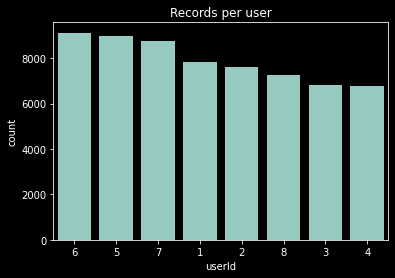

In [7]:

sns.countplot(x = 'userId',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.userId.value_counts().index);
plt.title("Records per user");

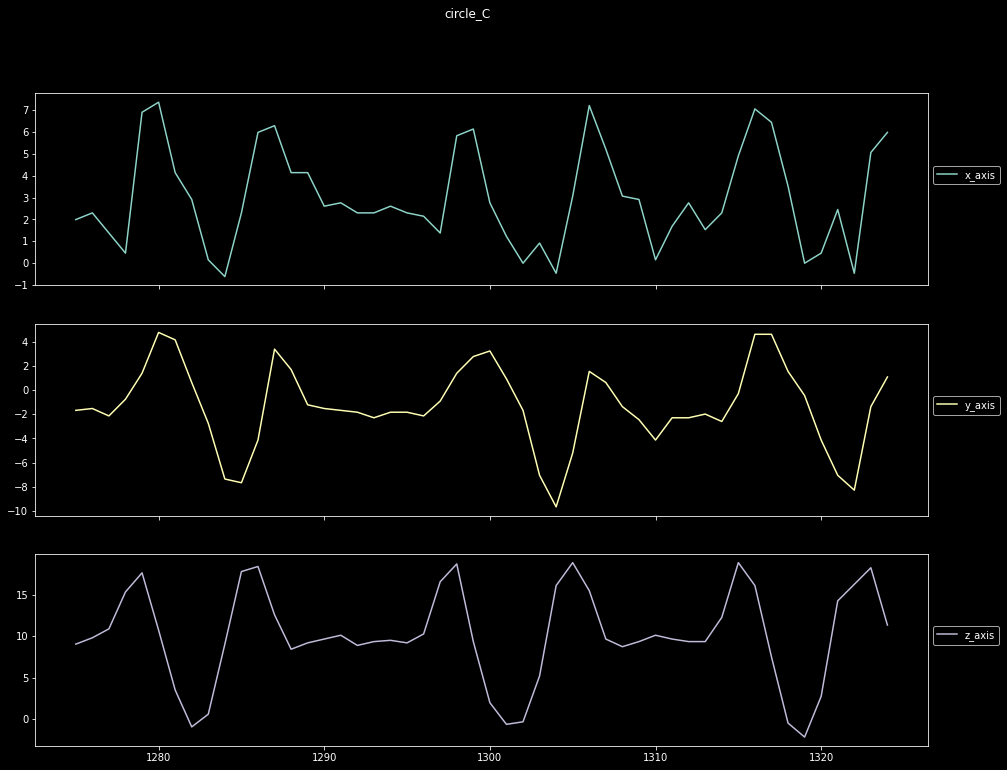

In [8]:
def plot_activity(activity, df):
    data = df[df['gesture'] == activity][['x_axis', 'y_axis', 'z_axis']][:50]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

plot_activity("circle_C", df);        

In [9]:
temp_df = df[['userId', 'gesture']]
df1 = temp_df[temp_df['userId'] == 1]
df2 = temp_df[temp_df['userId'] == 2]
df3 = temp_df[temp_df['userId'] == 3]
df4 = temp_df[temp_df['userId'] == 4]
df5 = temp_df[temp_df['userId'] == 5]
df6 = temp_df[temp_df['userId'] == 6]
df7 = temp_df[temp_df['userId'] == 7]
df8 = temp_df[temp_df['userId'] == 8]
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
collabels = [1,2, 3, 4, 5 , 6, 7, 8,] #List of column labels for dataframe

#List of row labels for dataframe
rowlabels = []
for x in range(20):
  rowlabels.append(gestureTypeList[x])

epic_df = pd.DataFrame(index = rowlabels, columns = collabels) #Generate empty dataframe

#Loop to generate dataframe to count activity per users
currindex = collabels[0]
for d in df_list:
  for index, value in d.gesture.value_counts().items():
    epic_df.loc[index, currindex] = value
  currindex += 1
print("number of user records per gesture")
print(epic_df)

number of user records per gesture
             1    2    3    4    5    6    7    8
right      315  405  280  285  368  489  405  343
left       296  385  257  321  312  485  327  281
up         335  303  272  277  296  409  331  276
down       329  297  264  253  306  370  332  260
circle_C   381  404  358  390  428  461  468  385
circle_AC  443  403  344  372  410  435  439  384
square_C   519  523  398  419  578  589  585  470
square_AC  525  483  440  400  643  552  639  461
upRight    408  351  325  353  450  455  463  342
upLeft     355  304  305  302  432  413  443  311
RightDown  379  380  311  307  468  433  418  369
LeftDown   383  341  315  319  415  454  425  363
V          350  376  326  333  435  399  465  396
V_reverse  343  359  325  306  412  353  419  322
V_mirror   401  360  330  325  418  385  405  333
V_mirrorR  406  336  322  329  435  425  411  317
S_top      421  411  375  401  483  471  420  386
S_topM     425  397  393  376  544  487  408  442
S_down     419 

# Dataset split; Train and test

In [10]:
df_train = df[df['userId'] < 6]
df_test = df[df['userId'] > 5]
#from sklearn.model_selection import train_test_split

#df_train, df_test = train_test_split(df, test_size=0.2)

In [11]:
df_train.tail()

,timestamp,x_axis,y_axis,z_axis,gesture,userId
8992,2.401474e+12,-4.443638,5.975927,6.588843,S_downM,5
8993,2.401584e+12,-4.750096,5.363012,6.435614,S_downM,5
8994,2.401694e+12,-4.596867,5.975927,6.129157,S_downM,5
8995,2.401804e+12,-5.516241,4.137181,5.669470,S_downM,5
8996,2.401914e+12,-4.443638,6.435614,5.822699,S_downM,5


In [12]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x_axis', 'y_axis', 'z_axis']

scaler = RobustScaler()
print(scaler)
scaler = scaler.fit(df_train[scale_columns])
print(scaler)
print(df_train[scale_columns].to_numpy())
#df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
#df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())
#print(df_train.loc[:, scale_columns])

RobustScaler()
RobustScaler()
[[ 1.532289 -0.919373 10.113108]
 [ 0.919373 -0.919373  9.959879]
 [ 1.838747 -0.153229 10.726024]
 ...
 [-4.596867  5.975927  6.129157]
 [-5.516241  4.137181  5.66947 ]
 [-4.443638  6.435614  5.822699]]


In [13]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

#Time steps help determine the memory of the lstm cells. Here the network will have a memory of 200
TIME_STEPS = 50 
STEP = 20
X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
)

In [14]:
print(X_test)

[[[ 0.459687  0.766145 10.113108]
  [ 0.919373  0.919373 10.266337]
  [ 1.072602  0.766145 10.113108]
  ...
  [-1.37906   0.153229  9.959879]
  [-0.919373  0.306458  9.80665 ]
  [-0.766145 -0.306458 10.419566]]

 [[ 0.612916  0.153229  9.959879]
  [ 0.153229 -0.306458  9.653421]
  [-0.766145 -1.072602 10.419566]
  ...
  [-0.306458 -1.991976  9.653421]
  [ 0.       -2.604892 10.419566]
  [-0.459687 -1.37906  10.266337]]

 [[ 0.612916 -1.072602 10.266337]
  [ 0.       -0.459687  9.80665 ]
  [ 0.766145 -2.604892  9.500193]
  ...
  [ 1.532289  1.37906  10.572795]
  [ 1.225831  1.532289 10.113108]
  [ 1.225831  1.37906   9.959879]]

 ...

 [[-3.677494  2.451663  7.967903]
  [-4.443638  1.532289  9.346964]
  [-3.983952  1.37906   9.346964]
  ...
  [ 2.451663 -6.895301 10.572795]
  [ 4.443638 -9.500193 10.572795]
  [ 7.967903  1.532289 11.492168]]

 [[-3.217807  0.919373  8.887277]
  [-4.443638  0.306458  9.500193]
  [-4.137181  0.306458  9.040505]
  ...
  [ 6.282385 -6.588843 11.492168]
  [ 

In [15]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [16]:
print(X_train.shape, y_train.shape)

(1900, 50, 3) (1900, 20)


In [17]:
#from keras.optimizers import Adam
from keras.optimizers import adam_v2


model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['acc'])

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    shuffle=False
)

Epoch 1/100
60/60 [==============================] - 6s 33ms/step - loss: 3.0644 - acc: 0.0568 - val_loss: 2.8582 - val_acc: 0.1372
Epoch 2/100
60/60 [==============================] - 1s 24ms/step - loss: 2.8061 - acc: 0.1000 - val_loss: 2.6315 - val_acc: 0.1858
Epoch 3/100
60/60 [==============================] - 1s 23ms/step - loss: 2.6717 - acc: 0.1416 - val_loss: 2.5229 - val_acc: 0.1962
Epoch 4/100
60/60 [==============================] - 1s 23ms/step - loss: 2.5253 - acc: 0.1811 - val_loss: 2.3904 - val_acc: 0.2624
Epoch 5/100
60/60 [==============================] - 1s 23ms/step - loss: 2.3575 - acc: 0.2495 - val_loss: 2.3153 - val_acc: 0.2456
Epoch 6/100
60/60 [==============================] - 1s 23ms/step - loss: 2.0720 - acc: 0.3174 - val_loss: 2.0157 - val_acc: 0.3014
Epoch 7/100
60/60 [==============================] - 1s 23ms/step - loss: 1.7587 - acc: 0.4242 - val_loss: 1.9644 - val_acc: 0.3477
Epoch 8/100
60/60 [==============================] - 1s 23ms/step - loss: 1.

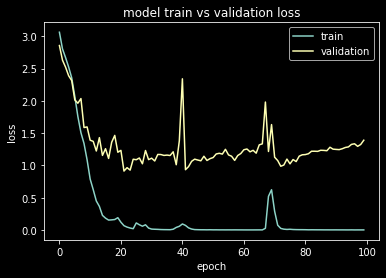

In [19]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [20]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 10ms/step - loss: 1.3910 - acc: 0.8014


[1.3909587860107422, 0.8014354109764099]

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0]))

              precision    recall  f1-score   support

    LeftDown       0.53      0.98      0.69        62
   RightDown       0.49      0.71      0.58        62
      S_down       0.70      0.96      0.81        69
     S_downM       0.94      0.70      0.81        71
       S_top       0.78      0.95      0.86        64
      S_topM       0.91      0.87      0.89        67
           V       0.81      0.60      0.69        63
    V_mirror       0.67      0.60      0.63        57
   V_mirrorR       0.77      0.72      0.75        57
   V_reverse       0.97      0.52      0.67        54
   circle_AC       0.87      0.62      0.72        63
    circle_C       1.00      0.62      0.77        66
        down       0.92      0.98      0.95        48
        left       0.93      1.00      0.96        54
       right       0.97      0.98      0.98        61
   square_AC       0.84      0.86      0.85        83
    square_C       0.97      0.83      0.89        82
          up       0.98    

C:\dev\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['LeftDown' 'RightDown' 'S_down' 'S_downM' 'S_top' 'S_topM' 'V' 'V_mirror'
 'V_mirrorR' 'V_reverse' 'circle_AC' 'circle_C' 'down' 'left' 'right'
 'square_AC' 'square_C' 'up' 'upLeft' 'upRight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [23]:
from sklearn.metrics import confusion_matrix

def plot_cm(title, y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred, labels=class_names)
  fig, ax = plt.subplots(figsize=(10, 10)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(230, 30, n=9),
      ax=ax
  )
  title_font = {'size':'25'} 
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_title('Confusion Matrix for ' + title, fontdict=title_font)
  plt.rcParams.update({'font.size': 20})
  ax.set_xticklabels(class_names, rotation = 45)
  ax.set_yticklabels(class_names, rotation=0)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

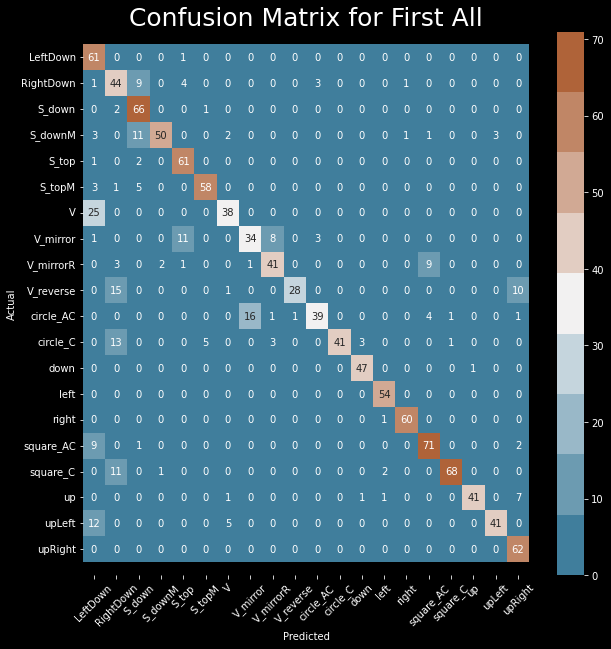

In [24]:
plot_cm(
  "First All",
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

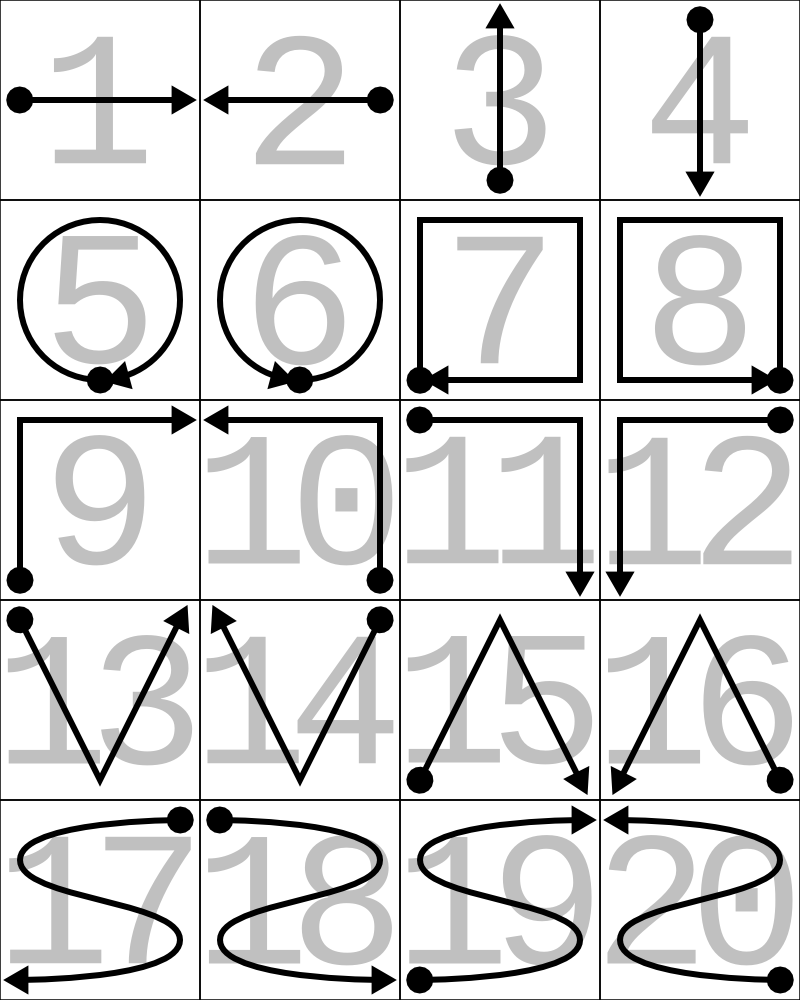

In [25]:
# R = reverse, C = Clockwise, AC = Anti Clockwise, M = Mirror

from IPython.display import Image
Image('gestures-dataset/gestures.png')

# Transfer Learning Pre Train Model

In [26]:
import tensorflow as tf
keras_file = "modelForTransferLearning.h5"
keras.models.save_model(model , keras_file)

# Approach 2: Learning on 15 Gesture. Transfer Learning on the rest 5.

In [27]:
# Gesture select 1-3,5-7,9-11,13-15,17-19
# For transfer learning: 4,8,12,16,20

In [28]:
gestureTypeList = ['right', 'left', 'up', 'down', 'circle_C', 'circle_AC',
                     'square_C', 'square_AC', 'upRight', 'upLeft','RightDown', 'LeftDown', 'V', 'V_reverse', 
                     'V_mirror', 'V_mirrorR', 
                     'S_top', 'S_topM', 'S_down', 'S_downM']

def getDataSpecificFileEachUser(fileName, gestureType):
  column_names = ['timeMilliscond', 'timeNano', 'timestamp', 'x_axis', 'y_axis', 'z_axis']
  df_file = pd.read_csv(fileName, sep=' ', header=None, names=column_names)
  df_file["z_axis"] = pd.to_numeric(df_file["z_axis"], downcast="float")
  df_file["x_axis"] = pd.to_numeric(df_file["x_axis"], downcast="float")
  df_file["y_axis"] = pd.to_numeric(df_file["y_axis"], downcast="float")
  df_file["timestamp"] = pd.to_numeric(df_file["timestamp"], downcast="float")
  df_file["timeNano"] = pd.to_numeric(df_file["timeNano"], downcast="float")
  df_file["timeMilliscond"] = pd.to_numeric(df_file["timeMilliscond"], downcast="float")
  return df_file

def getAllDataForEachUser(userId):
  # R = reverse, C = Clockwise, M = Mirror
   
   gesturesSize = 20
   df_file = pd.DataFrame()
   for x in range(gesturesSize):
     #gestureName = "gesture" + str(x+1)
     gestureName = gestureTypeList[x] 
     
     fileName = ""
     if (x+1) < 10:
       folderName = "/0"+ str(x+1)
     else: 
       folderName = "/"+ str(x+1)  
     for y in range(20):  
       fileNameText = ""
       if (y+1) < 10:
         fileNameText = "/0"+ str(y+1)
       else: 
         fileNameText = "/"+ str(y+1) 
       filePath = 'gestures-dataset/U0' + str(userId) + folderName + fileNameText + ".txt"
       #print(filePath)
       df = getDataSpecificFileEachUser(filePath, gestureName)
       df['gesture']= gestureName
       df_file = df_file.append(df, ignore_index=True)
   df_file['userId']= userId
   
   return df_file
   

df = getAllDataForEachUser(1)  
df = df.append(getAllDataForEachUser(2)) 
df = df.append(getAllDataForEachUser(3)) 
df = df.append(getAllDataForEachUser(4)) 
df = df.append(getAllDataForEachUser(5)) 
df = df.append(getAllDataForEachUser(6)) 
df = df.append(getAllDataForEachUser(7)) 
df = df.append(getAllDataForEachUser(8)) 



  
  


In [29]:
tmpDf = df.copy()
print(tmpDf.shape[0])

tmpDf = tmpDf[tmpDf.gesture != 'down']

tmpDf = tmpDf[tmpDf.gesture != 'square_AC']
tmpDf = tmpDf[tmpDf.gesture != 'LeftDown']
tmpDf = tmpDf[tmpDf.gesture != 'V_mirrorR']
tmpDf = tmpDf[tmpDf.gesture != 'S_downM']

print(tmpDf)

63168
      timeMilliscond      timeNano     timestamp    x_axis    y_axis  \
0       1.384186e+12  7.895260e+13  1.452892e+12  1.532289 -0.919373   
1       1.384186e+12  7.895271e+13  1.453002e+12  0.919373 -0.919373   
2       1.384186e+12  7.895282e+13  1.453112e+12  1.838747 -0.153229   
3       1.384186e+12  7.895291e+13  1.453222e+12  5.822699  3.371036   
4       1.384186e+12  7.895302e+13  1.453332e+12  6.435614  1.532289   
...              ...           ...           ...       ...       ...   
6841    1.387457e+12  6.594453e+14  9.329100e+11 -4.596867 -0.459687   
6842    1.387457e+12  6.594453e+14  9.330200e+11 -3.064578 -2.145205   
6843    1.387457e+12  6.594455e+14  9.331300e+11 -4.290410  0.306458   
6844    1.387457e+12  6.594456e+14  9.332400e+11 -5.056554 -0.306458   
6845    1.387457e+12  6.594457e+14  9.333500e+11 -3.983952 -0.306458   

         z_axis gesture  userId  
0     10.113108   right       1  
1      9.959879   right       1  
2     10.726024   right    

In [30]:

transferLearningDf = df[df.gesture == 'down']

transferLearningDf = transferLearningDf.append(df[df.gesture == 'square_AC'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'LeftDown'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'V_mirrorR'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'S_downM'])

print(transferLearningDf)

      timeMilliscond      timeNano     timestamp    x_axis    y_axis  \
946     1.384186e+12  7.927838e+13  1.778712e+12 -7.201759  5.056554   
947     1.384186e+12  7.927847e+13  1.778822e+12 -7.048530  4.903325   
948     1.384186e+12  7.927859e+13  1.778932e+12 -6.895301  4.903325   
949     1.384186e+12  7.927870e+13  1.779042e+12 -6.435614  4.137181   
950     1.384186e+12  7.927881e+13  1.779152e+12 -2.758120  1.225831   
...              ...           ...           ...       ...       ...   
7247    1.387457e+12  6.595416e+14  1.029270e+12 -4.443638  1.991976   
7248    1.387457e+12  6.595417e+14  1.029380e+12 -4.137181  2.145205   
7249    1.387457e+12  6.595418e+14  1.029490e+12 -5.056554  1.838747   
7250    1.387457e+12  6.595420e+14  1.029600e+12 -4.290410  1.225831   
7251    1.387457e+12  6.595420e+14  1.029710e+12 -4.903325  2.451663   

        z_axis  gesture  userId  
946   4.596867     down       1  
947   5.056554     down       1  
948   5.056554     down       1  

In [31]:
transferLearningDf.head()

,timeMilliscond,timeNano,timestamp,x_axis,y_axis,z_axis,gesture,userId
946,1.384186e+12,7.927838e+13,1.778712e+12,-7.201759,5.056554,4.596867,down,1
947,1.384186e+12,7.927847e+13,1.778822e+12,-7.048530,4.903325,5.056554,down,1
948,1.384186e+12,7.927859e+13,1.778932e+12,-6.895301,4.903325,5.056554,down,1
949,1.384186e+12,7.927870e+13,1.779042e+12,-6.435614,4.137181,4.443638,down,1
950,1.384186e+12,7.927881e+13,1.779152e+12,-2.758120,1.225831,0.766145,down,1


In [32]:
temp_df = tmpDf[['userId', 'gesture']]
df1 = temp_df[temp_df['userId'] == 1]
df2 = temp_df[temp_df['userId'] == 2]
df3 = temp_df[temp_df['userId'] == 3]
df4 = temp_df[temp_df['userId'] == 4]
df5 = temp_df[temp_df['userId'] == 5]
df6 = temp_df[temp_df['userId'] == 6]
df7 = temp_df[temp_df['userId'] == 7]
df8 = temp_df[temp_df['userId'] == 8]
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
collabels = [1,2, 3, 4, 5 , 6, 7, 8,] #List of column labels for dataframe

#List of row labels for dataframe
rowlabels = []
for x in range(20):
  rowlabels.append(gestureTypeList[x])

epic_df = pd.DataFrame(index = rowlabels, columns = collabels) #Generate empty dataframe

#Loop to generate dataframe to count activity per users
currindex = collabels[0]
for d in df_list:
  for index, value in d.gesture.value_counts().items():
    epic_df.loc[index, currindex] = value
  currindex += 1
print("number of user records per gesture")
print(epic_df)

number of user records per gesture
             1    2    3    4    5    6    7    8
right      315  405  280  285  368  489  405  343
left       296  385  257  321  312  485  327  281
up         335  303  272  277  296  409  331  276
down       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
circle_C   381  404  358  390  428  461  468  385
circle_AC  443  403  344  372  410  435  439  384
square_C   519  523  398  419  578  589  585  470
square_AC  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
upRight    408  351  325  353  450  455  463  342
upLeft     355  304  305  302  432  413  443  311
RightDown  379  380  311  307  468  433  418  369
LeftDown   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
V          350  376  326  333  435  399  465  396
V_reverse  343  359  325  306  412  353  419  322
V_mirror   401  360  330  325  418  385  405  333
V_mirrorR  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
S_top      421  411  375  401  483  471  420  386
S_topM     425  397  393  376  544  487  408  442
S_down     419 

In [33]:
df_train = tmpDf[tmpDf['userId'] < 6]
df_test = tmpDf[tmpDf['userId'] > 5]

In [34]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

#Time steps help determine the memory of the lstm cells. Here the network will have a memory of 200
TIME_STEPS = 50 
STEP = 20
X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
)

In [35]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [36]:
## Separate Validation,tests and training dataset


In [37]:
df_train = tmpDf[tmpDf['userId'] < 6]
df_test = tmpDf[(tmpDf['userId'] > 5) & (tmpDf['userId'] < 8)]
df_val = tmpDf[tmpDf['userId'] == 8]


In [38]:
X_val, y_val = create_dataset(
    df_val[['x_axis', 'y_axis', 'z_axis']], 
    df_val.gesture, 
    TIME_STEPS, 
    STEP
)
y_val = enc.transform(y_val)

## Approach 2: Best Model, premutations

In [39]:
allHistory = []
allresult = []
allvalues = []
index = 0
def createModelAndTrain(index, X_test, y_test,n1,n2,drop,dropV, batch):
  values = "index: " + str(index) + " n1: " + str(n1) + " n2: " + str(n2) + " drop: " + str(drop) + " dropv : " + str(dropV) + " batch " + str(batch)
  print(values)
  model = keras.Sequential()
  model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=n1, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
  )
  model.add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.Dense(units=n2, activation='relu'))
  if(drop):
      model.add(keras.layers.Dropout(rate=dropV))
  model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  history = model.fit(
    X_train, y_train,
    epochs=36,
    batch_size=batch,
    #validation_split = 0.1,
    validation_data=(X_val, y_val),
    shuffle=False
  )
  result = model.evaluate(X_test, y_test)
  print(result)
  return history,result,values

neurons = [128]
neurons2 = [128,64,32]
dropoutLayer = [False]
#dropoutLayerV = [0.25, 0.5, 0.75]
batchSize = [16, 32]
for n1 in neurons:
  for n2 in neurons2:
    for drop in dropoutLayer:
      for batch in batchSize:
        history, result, values = createModelAndTrain(index, X_test, y_test,n1,n2,drop,0.2, batch)
        allHistory.append(history)
        allresult.append(result)
        allvalues.append(values)
        index = index + 1
              

index: 0 n1: 128 n2: 128 drop: False dropv : 0.2 batch 16
Epoch 1/36
89/89 [==============================] - 15s 103ms/step - loss: 2.8100 - acc: 0.0580 - val_loss: 2.4716 - val_acc: 0.1630
Epoch 2/36
89/89 [==============================] - 8s 94ms/step - loss: 2.5532 - acc: 0.1012 - val_loss: 2.2473 - val_acc: 0.2333
Epoch 3/36
89/89 [==============================] - 9s 97ms/step - loss: 2.3788 - acc: 0.1571 - val_loss: 2.1413 - val_acc: 0.2222
Epoch 4/36
89/89 [==============================] - 8s 91ms/step - loss: 2.1719 - acc: 0.2201 - val_loss: 2.0000 - val_acc: 0.2926
Epoch 5/36
89/89 [==============================] - 9s 101ms/step - loss: 1.8522 - acc: 0.3291 - val_loss: 2.0920 - val_acc: 0.2741
Epoch 6/36
89/89 [==============================] - 9s 97ms/step - loss: 1.5992 - acc: 0.4360 - val_loss: 1.6837 - val_acc: 0.4037
Epoch 7/36
89/89 [==============================] - 9s 96ms/step - loss: 1.3230 - acc: 0.5287 - val_loss: 2.2548 - val_acc: 0.3370
Epoch 8/36
89/89 [====

In [40]:
for x in range(len(allresult)):
  print("---")
  print("result: ")
  print(allresult[x])
  print("values: ")
  print(allvalues[x])
  


---
result: 
[1.0436370372772217, 0.783261775970459]
values: 
index: 0 n1: 128 n2: 128 drop: False dropv : 0.2 batch 16
---
result: 
[1.0657825469970703, 0.7736051678657532]
values: 
index: 1 n1: 128 n2: 128 drop: False dropv : 0.2 batch 32
---
result: 
[1.1205213069915771, 0.8100858330726624]
values: 
index: 2 n1: 128 n2: 64 drop: False dropv : 0.2 batch 16
---
result: 
[1.24083411693573, 0.7489270567893982]
values: 
index: 3 n1: 128 n2: 64 drop: False dropv : 0.2 batch 32
---
result: 
[0.8801280856132507, 0.8175965547561646]
values: 
index: 4 n1: 128 n2: 32 drop: False dropv : 0.2 batch 16
---
result: 
[0.8870396614074707, 0.8057940006256104]
values: 
index: 5 n1: 128 n2: 32 drop: False dropv : 0.2 batch 32


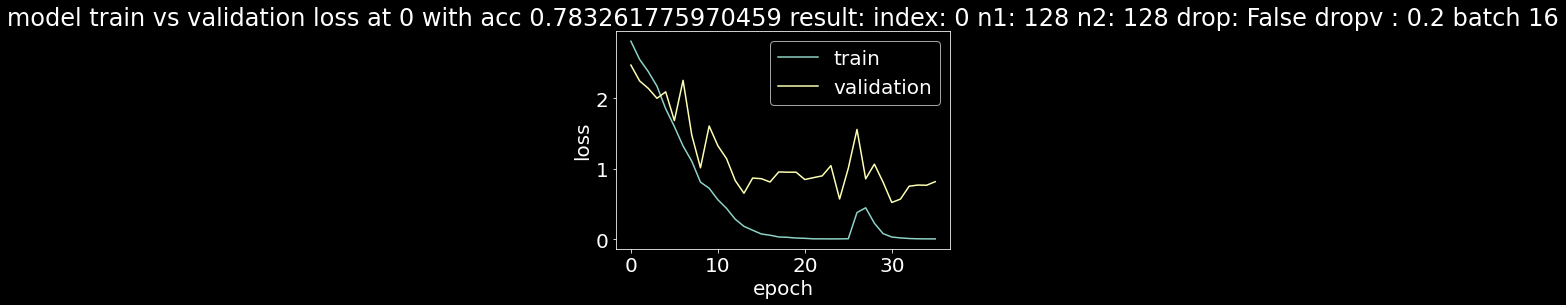

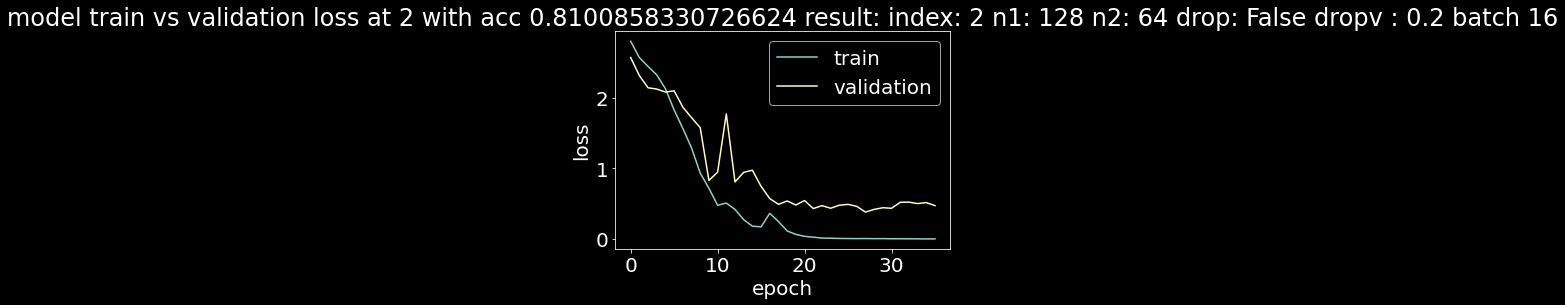

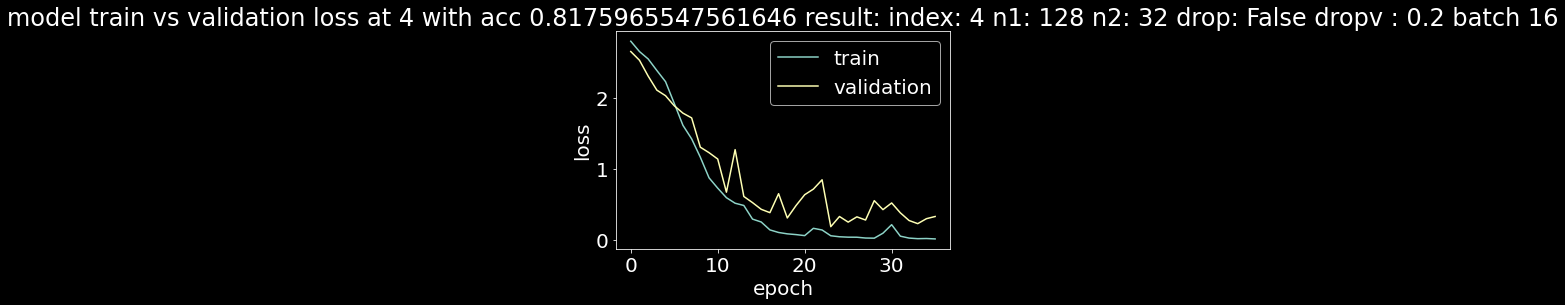

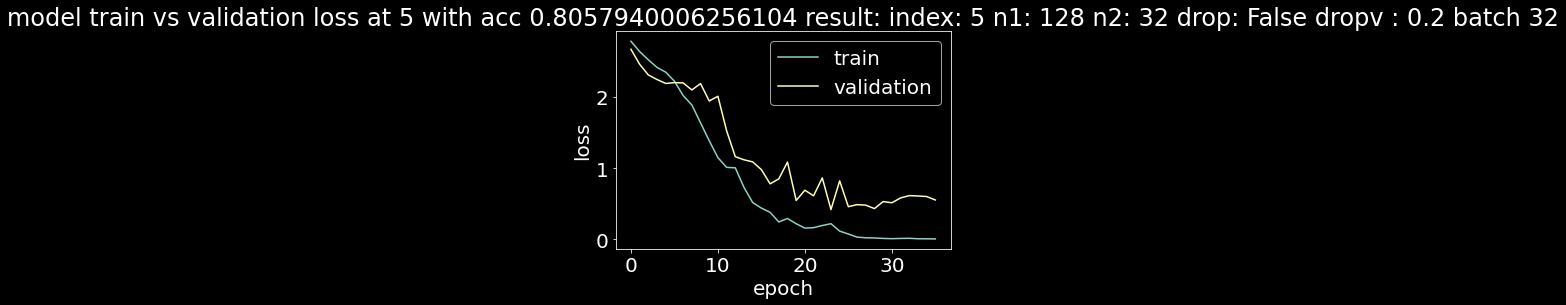

In [41]:
from matplotlib import pyplot

def drawGraph(index, history, acc,  value):
  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])
  pyplot.title('model train vs validation loss at ' + str(index) + " with acc "+ str(acc) + " result: " +  value)
  pyplot.ylabel('loss')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()

for x in range(len(allresult)):
  result = allresult[x]
  value = allvalues[x]
  acc = result[1]
  if(acc > 0.78):
    history = allHistory[x]
    drawGraph(x,history, acc, value)


## Training 15 Gesture Model 

In [42]:
from keras.optimizers import adam_v2


model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [43]:
history = model.fit(
    X_train, y_train,
    epochs=36,
    batch_size=16,
    #validation_split = 0.1,
    validation_data=(X_val, y_val),
    #validation_data=(X_test, y_test),
    shuffle=False
)

Epoch 1/36
89/89 [==============================] - 11s 65ms/step - loss: 2.7936 - acc: 0.0778 - val_loss: 2.5121 - val_acc: 0.1444
Epoch 2/36
89/89 [==============================] - 5s 54ms/step - loss: 2.5026 - acc: 0.1316 - val_loss: 2.1572 - val_acc: 0.2630
Epoch 3/36
89/89 [==============================] - 5s 53ms/step - loss: 2.3498 - acc: 0.1748 - val_loss: 2.0291 - val_acc: 0.2519
Epoch 4/36
89/89 [==============================] - 5s 53ms/step - loss: 2.0986 - acc: 0.2527 - val_loss: 1.8381 - val_acc: 0.2815
Epoch 5/36
89/89 [==============================] - 4s 51ms/step - loss: 1.9146 - acc: 0.3163 - val_loss: 1.6711 - val_acc: 0.2889
Epoch 6/36
89/89 [==============================] - 5s 52ms/step - loss: 1.6239 - acc: 0.3956 - val_loss: 1.8461 - val_acc: 0.2852
Epoch 7/36
89/89 [==============================] - 5s 51ms/step - loss: 1.4097 - acc: 0.5152 - val_loss: 1.7118 - val_acc: 0.4667
Epoch 8/36
89/89 [==============================] - 5s 51ms/step - loss: 1.1471 - 

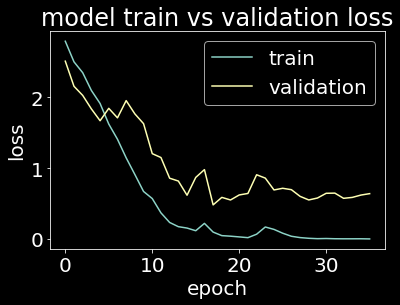

In [44]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [45]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 1s 19ms/step - loss: 1.2515 - acc: 0.7972


[1.2514610290527344, 0.7972102761268616]

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0]))

              precision    recall  f1-score   support

   RightDown       0.48      0.65      0.55        62
      S_down       0.88      0.99      0.93        69
       S_top       0.79      0.98      0.87        64
      S_topM       0.71      0.89      0.79        66
           V       0.73      0.89      0.80        63
    V_mirror       0.85      0.70      0.76        56
   V_reverse       0.79      0.50      0.61        54
   circle_AC       0.97      0.62      0.76        63
    circle_C       0.62      0.63      0.63        65
        left       0.98      0.94      0.96        54
       right       0.97      0.98      0.98        61
    square_C       0.83      0.72      0.77        83
          up       0.90      0.75      0.82        51
      upLeft       0.98      0.95      0.97        59
     upRight       0.75      0.74      0.75        62

    accuracy                           0.80       932
   macro avg       0.82      0.80      0.80       932
weighted avg       0.81   

C:\dev\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['RightDown' 'S_down' 'S_top' 'S_topM' 'V' 'V_mirror' 'V_reverse'
 'circle_AC' 'circle_C' 'left' 'right' 'square_C' 'up' 'upLeft' 'upRight'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


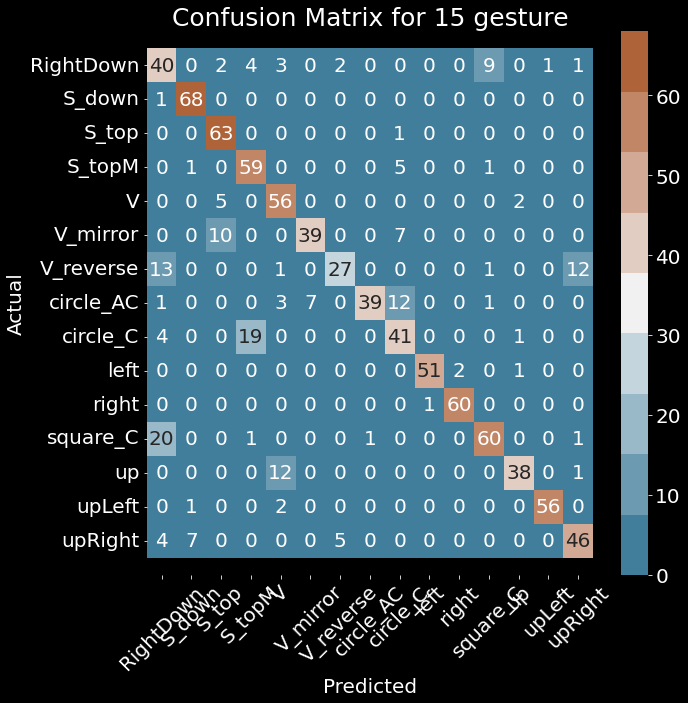

In [48]:

plot_cm(
  "15 gesture",
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

## Approach 2 with Transfer Learning

In [49]:

import tensorflow as tf
keras_file = "pretrainedModel.h5"
keras.models.save_model(model , keras_file)

In [50]:
from keras.models import load_model
 
preTrainedModel = load_model('pretrainedModel.h5')
preTrainedModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 256)               135168    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 15)                1935      
Total params: 169,999
Trainable params: 169,999
Non-trainable params: 0
_________________________________________________________________


In [51]:
import tensorflow as tf 
#fine tuning - transfer
transferModel = keras.Sequential()
for layer in preTrainedModel.layers[:-1]: # go through until last layer
    layer.trainable= True
    transferModel.add(layer)
    
transferModel.add(keras.layers.Dense(5, activation='softmax'))
# providing input
transferModel.build([None, 50, 3]) 
transferModel.summary()
transferModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 256)               135168    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 645       
Total params: 168,709
Trainable params: 168,709
Non-trainable params: 0
_________________________________________________________________


In [52]:
temp_df = transferLearningDf[['userId', 'gesture']]
df1 = temp_df[temp_df['userId'] == 1]
df2 = temp_df[temp_df['userId'] == 2]
df3 = temp_df[temp_df['userId'] == 3]
df4 = temp_df[temp_df['userId'] == 4]
df5 = temp_df[temp_df['userId'] == 5]
df6 = temp_df[temp_df['userId'] == 6]
df7 = temp_df[temp_df['userId'] == 7]
df8 = temp_df[temp_df['userId'] == 8]
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
collabels = [1,2, 3, 4, 5 , 6, 7, 8,] #List of column labels for dataframe

#List of row labels for dataframe

gestureTransferList = ['down', 'square_AC', 'LeftDown', 'V_mirrorR', 'S_downM']
rowlabels = []
for x in range(5):
  rowlabels.append(gestureTransferList[x])

epic_df = pd.DataFrame(index = rowlabels, columns = collabels) #Generate empty dataframe

#Loop to generate dataframe to count activity per users
currindex = collabels[0]
for d in df_list:
  for index, value in d.gesture.value_counts().items():
    epic_df.loc[index, currindex] = value
  currindex += 1
print("number of user records per gesture")
print(epic_df)

number of user records per gesture
             1    2    3    4    5    6    7    8
down       329  297  264  253  306  370  332  260
square_AC  525  483  440  400  643  552  639  461
LeftDown   383  341  315  319  415  454  425  363
V_mirrorR  406  336  322  329  435  425  411  317
S_downM    422  375  449  350  608  558  473  406


In [53]:
df_train = transferLearningDf[transferLearningDf['userId'] < 6]
df_test = transferLearningDf[transferLearningDf['userId'] > 5]

In [54]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

#Time steps help determine the memory of the lstm cells. Here the network will have a memory of 200
TIME_STEPS = 50 
STEP = 20
X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
)

In [55]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [56]:
print(X_train.shape, y_train.shape)

(485, 50, 3) (485, 5)


In [57]:
history = transferModel.fit(
    X_train, y_train,
    epochs=6,
    batch_size=16,
    validation_split = 0.1,
    #validation_data=(X_test, y_test),
    shuffle=False
)

Epoch 1/6
28/28 [==============================] - 8s 102ms/step - loss: 3.1115 - acc: 0.1835 - val_loss: 2.9889 - val_acc: 0.0000e+00
Epoch 2/6
28/28 [==============================] - 1s 36ms/step - loss: 1.0104 - acc: 0.5826 - val_loss: 0.5827 - val_acc: 0.8776
Epoch 3/6
28/28 [==============================] - 2s 56ms/step - loss: 0.3050 - acc: 0.9404 - val_loss: 0.1720 - val_acc: 0.9796
Epoch 4/6
28/28 [==============================] - 2s 59ms/step - loss: 0.1287 - acc: 0.9817 - val_loss: 0.1068 - val_acc: 1.0000
Epoch 5/6
28/28 [==============================] - 2s 67ms/step - loss: 0.0650 - acc: 0.9908 - val_loss: 0.0881 - val_acc: 1.0000
Epoch 6/6
28/28 [==============================] - 1s 47ms/step - loss: 0.0397 - acc: 0.9954 - val_loss: 0.0648 - val_acc: 1.0000


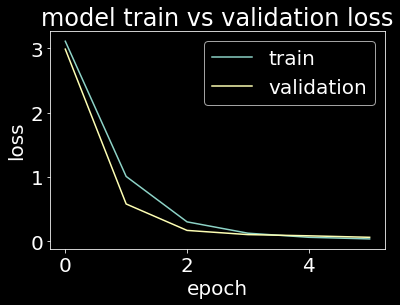

In [58]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [59]:
transferModel.evaluate(X_test, y_test)

10/10 [==============================] - 1s 19ms/step - loss: 0.5846 - acc: 0.7875


[0.584563136100769, 0.7875000238418579]

In [60]:
y_pred = transferModel.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0]))

              precision    recall  f1-score   support

    LeftDown       0.67      1.00      0.81        62
     S_downM       0.98      0.69      0.81        70
   V_mirrorR       0.83      0.69      0.75        58
        down       0.95      0.81      0.87        47
   square_AC       0.70      0.77      0.74        83

    accuracy                           0.79       320
   macro avg       0.83      0.79      0.80       320
weighted avg       0.82      0.79      0.79       320



C:\dev\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['LeftDown' 'S_downM' 'V_mirrorR' 'down' 'square_AC'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


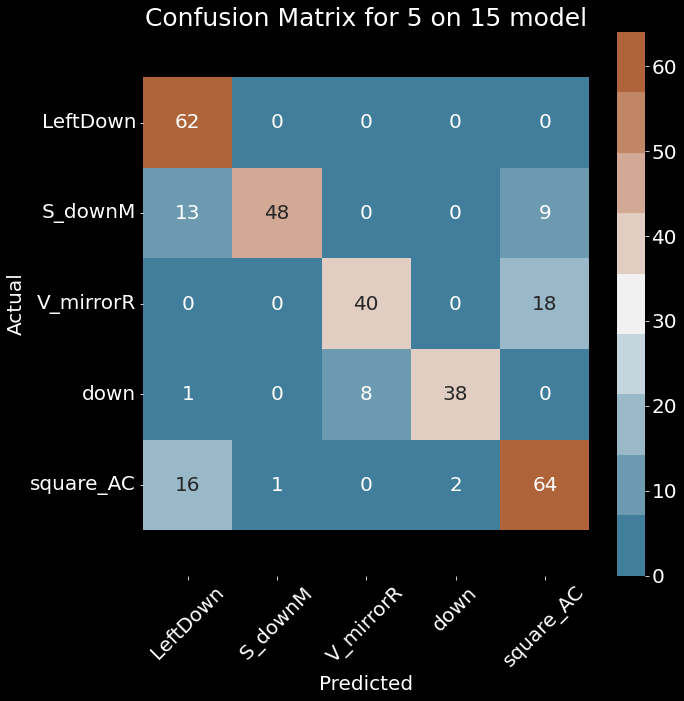

In [62]:
plot_cm(
  "5 on 15 model",
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

## Approach 2 without Transfer Learning

In [63]:
df_train = transferLearningDf[transferLearningDf['userId'] < 6]
df_test = transferLearningDf[transferLearningDf['userId'] > 5]

In [64]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

#Time steps help determine the memory of the lstm cells. Here the network will have a memory of 200
TIME_STEPS = 50 
STEP = 20
X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [65]:
print(X_train.shape, y_train.shape)

(485, 50, 3) (485, 5)


In [66]:
from keras.optimizers import adam_v2


model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

In [67]:
history = model.fit(
    X_train, y_train,
    epochs=36,
    batch_size=16,
    validation_split=0.1,
    #validation_data=(X_test, y_test),
    shuffle=False
)

Epoch 1/36
28/28 [==============================] - 8s 100ms/step - loss: 2.3552 - acc: 0.1124 - val_loss: 2.2838 - val_acc: 0.0000e+00
Epoch 2/36
28/28 [==============================] - 1s 43ms/step - loss: 1.5823 - acc: 0.2339 - val_loss: 1.7994 - val_acc: 0.1429
Epoch 3/36
28/28 [==============================] - 2s 55ms/step - loss: 1.4383 - acc: 0.3303 - val_loss: 1.5335 - val_acc: 0.3061
Epoch 4/36
28/28 [==============================] - 2s 54ms/step - loss: 1.3743 - acc: 0.3922 - val_loss: 1.2682 - val_acc: 0.4694
Epoch 5/36
28/28 [==============================] - 2s 54ms/step - loss: 1.2907 - acc: 0.4083 - val_loss: 1.1798 - val_acc: 0.6122
Epoch 6/36
28/28 [==============================] - 2s 56ms/step - loss: 1.2053 - acc: 0.4358 - val_loss: 1.2030 - val_acc: 0.6122
Epoch 7/36
28/28 [==============================] - 1s 47ms/step - loss: 1.1320 - acc: 0.3922 - val_loss: 0.5232 - val_acc: 0.7755
Epoch 8/36
28/28 [==============================] - 1s 50ms/step - loss: 1.017

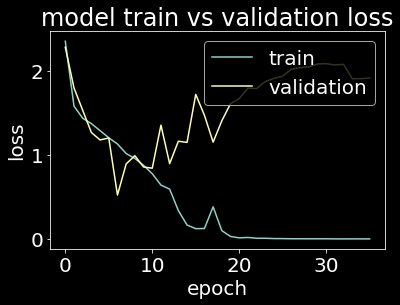

In [68]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [69]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 2s 15ms/step - loss: 2.1669 - acc: 0.6844


[2.1668877601623535, 0.684374988079071]

In [70]:
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0]))

              precision    recall  f1-score   support

    LeftDown       0.47      0.97      0.63        62
     S_downM       0.81      0.36      0.50        70
   V_mirrorR       1.00      0.66      0.79        58
        down       0.79      0.96      0.87        47
   square_AC       0.77      0.61      0.68        83

    accuracy                           0.68       320
   macro avg       0.77      0.71      0.69       320
weighted avg       0.76      0.68      0.68       320



C:\dev\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['LeftDown' 'S_downM' 'V_mirrorR' 'down' 'square_AC'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


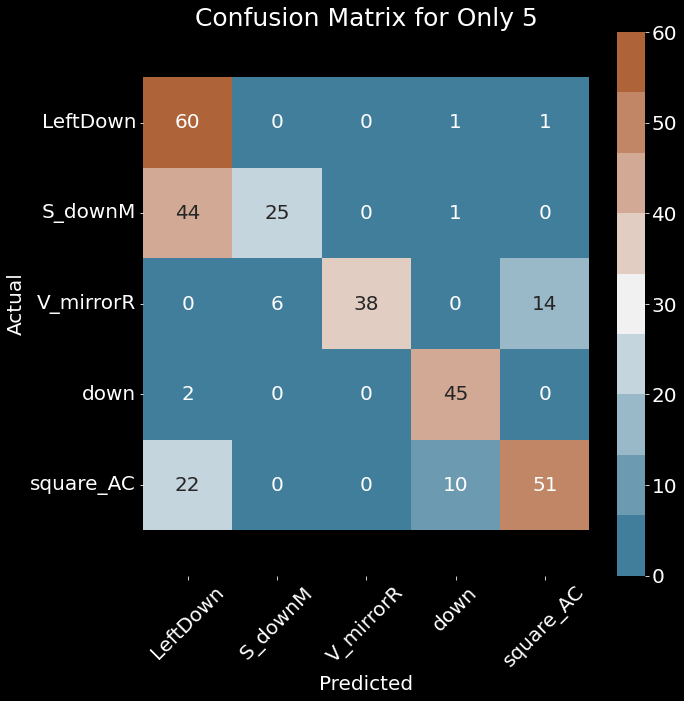

In [72]:
plot_cm(
  "Only 5",
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

## Results with No Transfer Learning and with Transfer Learning for 5 Gestures

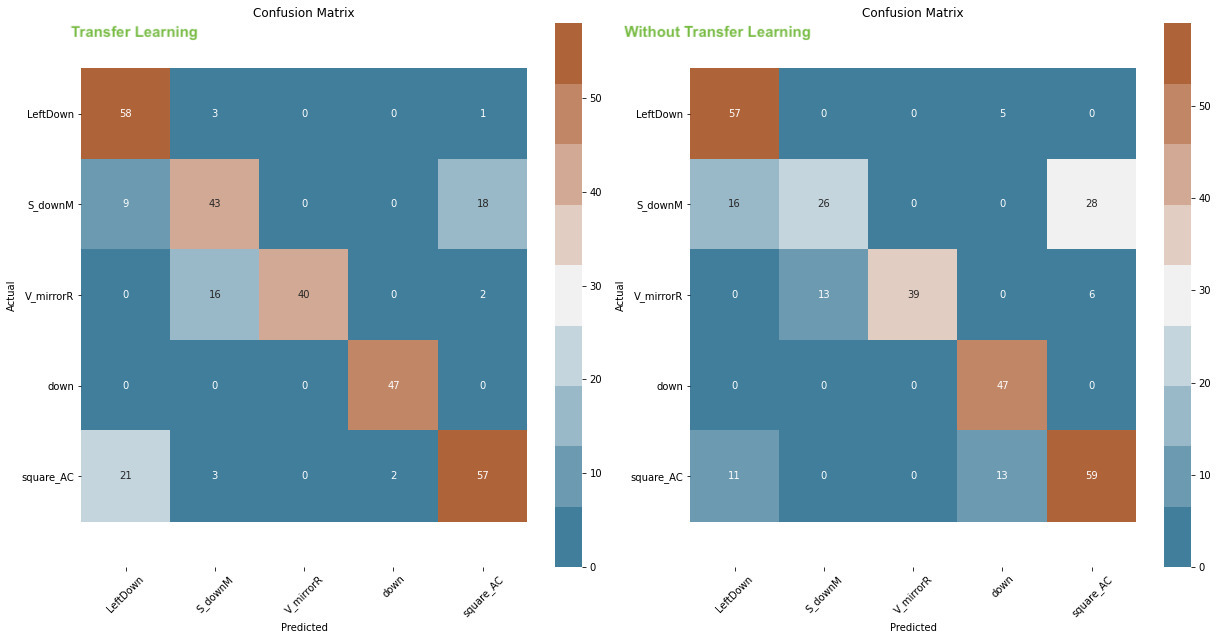

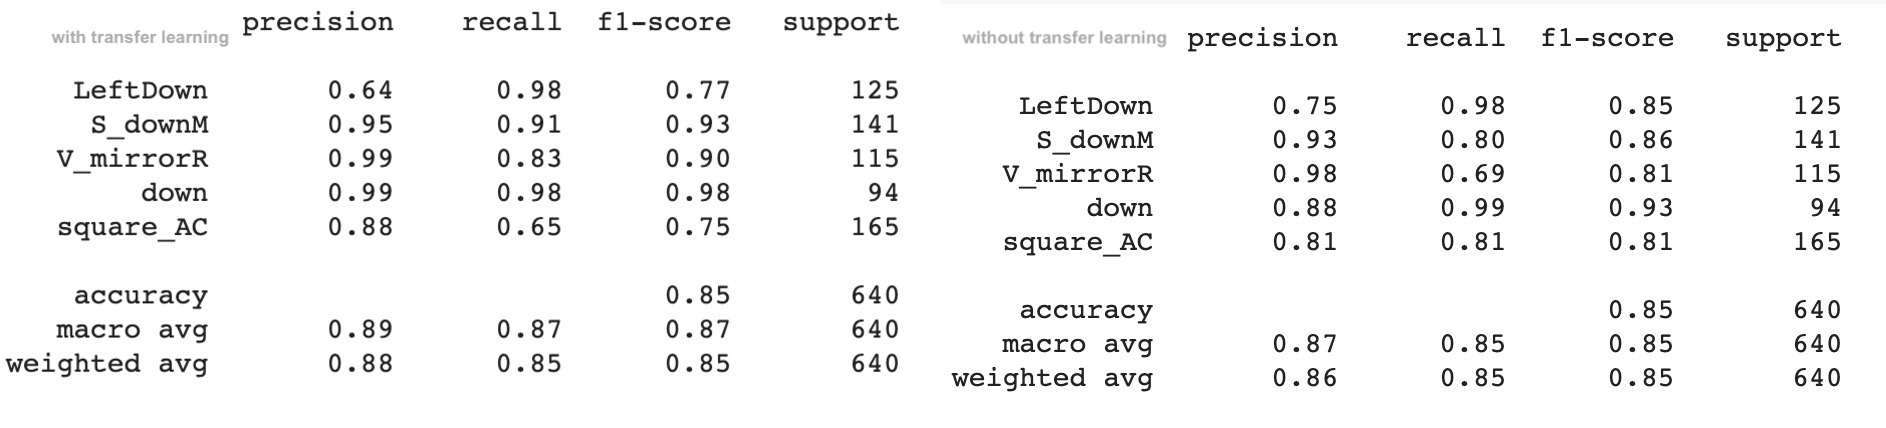

# Approach 3: Training with & without Transfer Learning on smaller(10%) dataset  (5 gestures)

In [73]:
transferLearningDf = df[df.gesture == 'down']
transferLearningDf = transferLearningDf.append(df[df.gesture == 'square_AC'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'LeftDown'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'V_mirrorR'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'S_downM'])


In [74]:
def getPercentPerClass(df, percent):
  df_down = df[df['gesture'] == "down"]
  df_square_AC = df[df['gesture'] == "square_AC"]
  df_LeftDown = df[df['gesture'] == "LeftDown"]
  df_V_mirrorR = df[df['gesture'] == "V_mirrorR"]
  df_S_downM = df[df['gesture'] == "S_downM"]

  finalDf = df_down.head(int(len(df_down)*(percent/100)))
  finalDf = finalDf.append(df_square_AC.head(int(len(df_square_AC)*(percent/100))))
  finalDf = finalDf.append(df_LeftDown.head(int(len(df_LeftDown)*(percent/100))))
  finalDf = finalDf.append(df_V_mirrorR.head(int(len(df_V_mirrorR)*(percent/100))))
  finalDf = finalDf.append(df_S_downM.head(int(len(df_S_downM)*(percent/100))))


  
  return finalDf

# divide the dataset with percentage per class on each userId.
def dividDatasetPer(percent):

  user1_df = transferLearningDf[transferLearningDf.userId == 1]
  user2_df = transferLearningDf[transferLearningDf.userId == 2]
  user3_df = transferLearningDf[transferLearningDf.userId == 3]
  user4_df = transferLearningDf[transferLearningDf.userId == 4]
  user5_df = transferLearningDf[transferLearningDf.userId == 5]
  user6_df = transferLearningDf[transferLearningDf.userId == 6]
  user7_df = transferLearningDf[transferLearningDf.userId == 7]
  user8_df = transferLearningDf[transferLearningDf.userId == 8]

  df = getPercentPerClass(user1_df, percent)
  df = df.append(getPercentPerClass(user2_df, percent))
  df = df.append(getPercentPerClass(user3_df, percent))
  df = df.append(getPercentPerClass(user4_df, percent))
  df = df.append(getPercentPerClass(user5_df, percent))
  df = df.append(getPercentPerClass(user6_df, percent))
  df = df.append(getPercentPerClass(user7_df, percent))
  df = df.append(getPercentPerClass(user8_df, percent))

  return df

percentDf= dividDatasetPer(10)


In [75]:
percentDf.head()

,timeMilliscond,timeNano,timestamp,x_axis,y_axis,z_axis,gesture,userId
946,1.384186e+12,7.927838e+13,1.778712e+12,-7.201759,5.056554,4.596867,down,1
947,1.384186e+12,7.927847e+13,1.778822e+12,-7.048530,4.903325,5.056554,down,1
948,1.384186e+12,7.927859e+13,1.778932e+12,-6.895301,4.903325,5.056554,down,1
949,1.384186e+12,7.927870e+13,1.779042e+12,-6.435614,4.137181,4.443638,down,1
950,1.384186e+12,7.927881e+13,1.779152e+12,-2.758120,1.225831,0.766145,down,1


In [76]:
percentDf.tail()

,timeMilliscond,timeNano,timestamp,x_axis,y_axis,z_axis,gesture,userId
6881,1.387457e+12,6.594575e+14,9.452500e+11,-5.056554,1.379060,8.734048,S_downM,8
6882,1.387457e+12,6.594577e+14,9.453600e+11,-5.363012,0.459687,8.121132,S_downM,8
6883,1.387457e+12,6.594578e+14,9.454700e+11,-5.056554,1.532289,8.427590,S_downM,8
6884,1.387457e+12,6.594579e+14,9.455800e+11,-7.354988,1.379060,8.427590,S_downM,8
6885,1.387457e+12,6.594580e+14,9.456900e+11,-5.822699,0.766145,8.427590,S_downM,8


## Analysis of Dataset

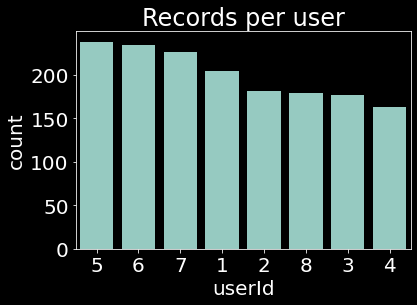

In [77]:

sns.countplot(x = 'userId',
              data = percentDf,
              palette=[sns.color_palette()[0]],
              order = percentDf.userId.value_counts().index);
plt.title("Records per user");

In [78]:
temp_df = percentDf[['userId', 'gesture']]
df1 = temp_df[temp_df['userId'] == 1]
df2 = temp_df[temp_df['userId'] == 2]
df3 = temp_df[temp_df['userId'] == 3]
df4 = temp_df[temp_df['userId'] == 4]
df5 = temp_df[temp_df['userId'] == 5]
df6 = temp_df[temp_df['userId'] == 6]
df7 = temp_df[temp_df['userId'] == 7]
df8 = temp_df[temp_df['userId'] == 8]
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
collabels = [1,2, 3, 4, 5 , 6, 7, 8,] #List of column labels for dataframe

#List of row labels for dataframe

rowlabels = ["down","square_AC","LeftDown","V_mirrorR", "S_downM"]
#for x in range(5):
 # rowlabels.append(gestureTypeList[x])

epic_df = pd.DataFrame(index = rowlabels, columns = collabels) #Generate empty dataframe

#Loop to generate dataframe to count activity per users
currindex = collabels[0]
for d in df_list:
  for index, value in d.gesture.value_counts().items():
    epic_df.loc[index, currindex] = value
  currindex += 1
print("number of user records per gesture")
print(epic_df)

number of user records per gesture
            1   2   3   4   5   6   7   8
down       32  29  26  25  30  37  33  26
square_AC  52  48  44  40  64  55  63  46
LeftDown   38  34  31  31  41  45  42  36
V_mirrorR  40  33  32  32  43  42  41  31
S_downM    42  37  44  35  60  55  47  40


## Creating test-train split

In [79]:
#df_train = percentDf[percentDf['userId'] < 6]
#df_test = percentDf[percentDf['userId'] > 5]

df_train = percentDf[percentDf['userId'] < 6]
df_test = percentDf[(percentDf['userId'] > 5) & (percentDf['userId'] < 8)]
df_val = percentDf[percentDf['userId'] == 8]

In [80]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

#Time steps help determine the memory of the lstm cells. Here the network will have a memory of 200
TIME_STEPS = 50 
STEP = 20
X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
)

In [81]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [82]:
X_val, y_val = create_dataset(
    df_val[['x_axis', 'y_axis', 'z_axis']], 
    df_val.gesture, 
    TIME_STEPS, 
    STEP
)
y_val = enc.transform(y_val)

In [83]:
print(X_train.shape, y_train.shape)

(46, 50, 3) (46, 5)


In [84]:
print(X_val.shape, y_val.shape)

(7, 50, 3) (7, 5)


## Sample Training of 10% of dataset with and without Transfer Learning

### Transfer Learning

In [85]:
from keras.models import load_model
 
preTrainedModel = load_model('pretrainedModel.h5')
preTrainedModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 256)               135168    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 15)                1935      
Total params: 169,999
Trainable params: 169,999
Non-trainable params: 0
_________________________________________________________________


In [86]:
import tensorflow as tf 
#fine tuning - transfer
transferModel = keras.Sequential()
for layer in preTrainedModel.layers[:-1]: # go through until last layer
    layer.trainable= True
    transferModel.add(layer)
    
transferModel.add(keras.layers.Dense(5, activation='softmax'))
# providing input
transferModel.build([None, 50, 3]) 
transferModel.summary()
transferModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 256)               135168    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 645       
Total params: 168,709
Trainable params: 168,709
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = transferModel.fit(
    X_train, y_train,
    epochs=6,
    batch_size=16,
    #validation_split = 0.1,
    validation_data=(X_val, y_val),
    shuffle=False
)

Epoch 1/6
3/3 [==============================] - 6s 636ms/step - loss: 2.1442 - acc: 0.1087 - val_loss: 2.1240 - val_acc: 0.4286
Epoch 2/6
3/3 [==============================] - 0s 55ms/step - loss: 1.3226 - acc: 0.4348 - val_loss: 1.7771 - val_acc: 0.4286
Epoch 3/6
3/3 [==============================] - 0s 55ms/step - loss: 1.1045 - acc: 0.5435 - val_loss: 1.5617 - val_acc: 0.4286
Epoch 4/6
3/3 [==============================] - 0s 54ms/step - loss: 0.9125 - acc: 0.6957 - val_loss: 1.4518 - val_acc: 0.4286
Epoch 5/6
3/3 [==============================] - 0s 76ms/step - loss: 0.6670 - acc: 0.8043 - val_loss: 1.3736 - val_acc: 0.4286
Epoch 6/6
3/3 [==============================] - 0s 70ms/step - loss: 0.5579 - acc: 0.8478 - val_loss: 1.3002 - val_acc: 0.2857


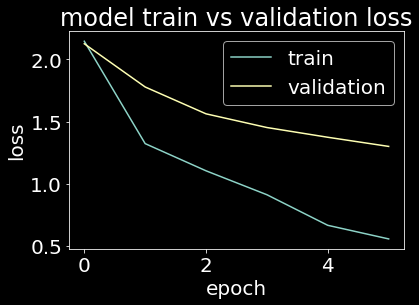

In [88]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [89]:
transferModel.evaluate(X_test, y_test)

1/1 [==============================] - 0s 51ms/step - loss: 1.6113 - acc: 0.3333


[1.6113301515579224, 0.3333333432674408]

In [90]:
y_pred = transferModel.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0]))

              precision    recall  f1-score   support

    LeftDown       0.29      0.50      0.36         4
     S_downM       0.50      1.00      0.67         4
   V_mirrorR       0.33      0.25      0.29         4
        down       0.00      0.00      0.00         3
   square_AC       0.00      0.00      0.00         6

    accuracy                           0.33        21
   macro avg       0.22      0.35      0.26        21
weighted avg       0.21      0.33      0.25        21



C:\dev\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['LeftDown' 'S_downM' 'V_mirrorR' 'down' 'square_AC'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


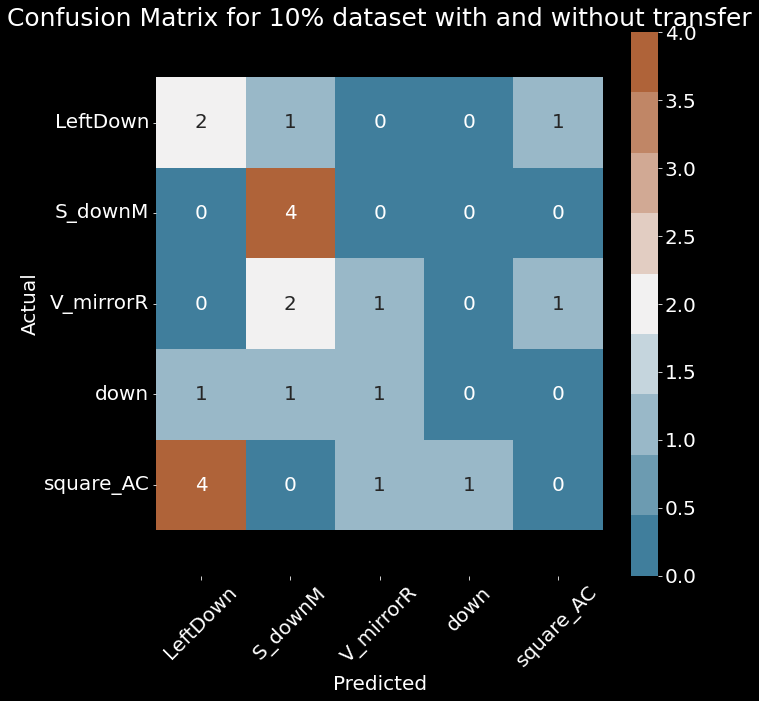

In [91]:
plot_cm(
  "10% dataset with and without transfer",
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

### Without Transfer Learning

In [92]:
from keras.optimizers import adam_v2


model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

In [93]:
history = model.fit(
    X_train, y_train,
    epochs=36,
    batch_size=16,
    #validation_split=0.1,
    validation_data=(X_val, y_val),
    shuffle=False
)

Epoch 1/36
3/3 [==============================] - 7s 639ms/step - loss: 1.7202 - acc: 0.1957 - val_loss: 1.5941 - val_acc: 0.2857
Epoch 2/36
3/3 [==============================] - 0s 71ms/step - loss: 1.5856 - acc: 0.2826 - val_loss: 1.5205 - val_acc: 0.2857
Epoch 3/36
3/3 [==============================] - 0s 58ms/step - loss: 1.5206 - acc: 0.3696 - val_loss: 1.4869 - val_acc: 0.2857
Epoch 4/36
3/3 [==============================] - 0s 59ms/step - loss: 1.4565 - acc: 0.4348 - val_loss: 1.4780 - val_acc: 0.2857
Epoch 5/36
3/3 [==============================] - 0s 76ms/step - loss: 1.3330 - acc: 0.6087 - val_loss: 1.4861 - val_acc: 0.1429
Epoch 6/36
3/3 [==============================] - 0s 84ms/step - loss: 1.3522 - acc: 0.5000 - val_loss: 1.4982 - val_acc: 0.1429
Epoch 7/36
3/3 [==============================] - 0s 77ms/step - loss: 1.3063 - acc: 0.5435 - val_loss: 1.4999 - val_acc: 0.2857
Epoch 8/36
3/3 [==============================] - 0s 110ms/step - loss: 1.2457 - acc: 0.5435 - v

In [94]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 2.4391 - acc: 0.4286


[2.439117193222046, 0.4285714328289032]

In [95]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0]))

              precision    recall  f1-score   support

    LeftDown       0.33      0.25      0.29         4
     S_downM       0.57      1.00      0.73         4
   V_mirrorR       0.40      0.50      0.44         4
        down       0.50      0.33      0.40         3
   square_AC       0.25      0.17      0.20         6

    accuracy                           0.43        21
   macro avg       0.41      0.45      0.41        21
weighted avg       0.39      0.43      0.39        21



C:\dev\Python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['LeftDown' 'S_downM' 'V_mirrorR' 'down' 'square_AC'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


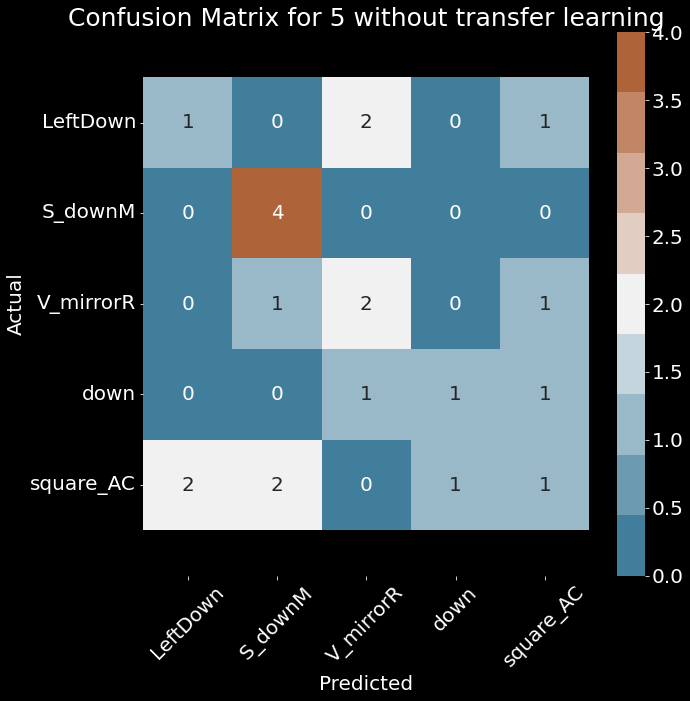

In [96]:
plot_cm(
  "5 without transfer learning",
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

### Result

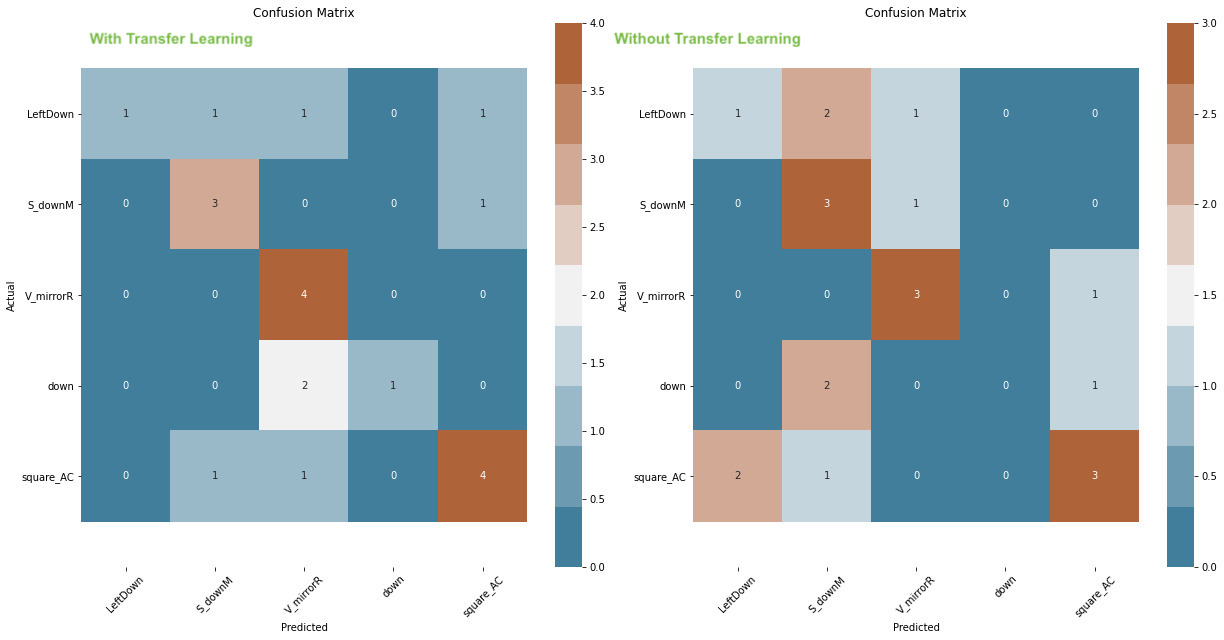

## Accuracy with and without Transfer Learning on percentages of dataset

In [97]:
transferLearningDf = df[df.gesture == 'down']
transferLearningDf = transferLearningDf.append(df[df.gesture == 'square_AC'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'LeftDown'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'V_mirrorR'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'S_downM'])


In [98]:
from keras.models import load_model
import tensorflow as tf 
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
TIME_STEPS = 30 
STEP = 2



def createTransferLearningModel():
  preTrainedModel = load_model('pretrainedModel.h5')
  transferModel = keras.Sequential()
  for layer in preTrainedModel.layers[:-1]: # go through until last layer
    layer.trainable= True
    transferModel.add(layer)
  transferModel.add(keras.layers.Dense(5, activation='softmax'))
  # providing input
  transferModel.build([None, 50, 3])
  transferModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return transferModel

def createNormalModel():
  model = keras.Sequential()
  model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=128, 
            input_shape=[X_train.shape[1], X_train.shape[2]]
        )
      )
  )
  model.add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.Dense(units=128, activation='relu'))
  #model.add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
  return model

def createDatasetSplit(df):
  #df_train = df[df['userId'] < 6]
  #df_test = df[(df['userId'] > 5) & (df['userId'] < 8)]
  #df_val = df[df['userId'] == 8]
  df_train = df[(df['userId'] > 1) & (df['userId'] < 7)]
  df_test = df[(df['userId'] > 6) & (df['userId'] < 9)]
  df_val = df[df['userId'] == 1]
  print("total dataset:")
  print(len(df))
  #print(df_train)
  X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
  )
  X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
  )
  X_val, y_val = create_dataset(
    df_val[['x_axis', 'y_axis', 'z_axis']], 
    df_val.gesture, 
    TIME_STEPS, 
    STEP
  )
  enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
  enc = enc.fit(y_train)
  y_train = enc.transform(y_train)
  y_test = enc.transform(y_test)
  y_val = enc.transform(y_val)
  print(X_train.shape, y_train.shape)
  print(X_test.shape, y_test.shape)
  print(X_val.shape, y_val.shape)
  return X_train, y_train, X_test, y_test, X_val, y_val, enc

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

def trainingModel(model, epochs, batchSize,X_train, y_train, X_val, y_val):
  history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batchSize,
    #validation_split=0.1,
    validation_data=(X_val, y_val),
    shuffle=False
  )
  return history









In [99]:
dataset_percent = [ 5,6,7]
acc_withTransfer = []
acc_normal = []
pred_withTransfer = []
pred_normal = []
for x in dataset_percent:
  print("Looking for Accuracy for " + str(x) + "% dataset")
  percentDf= dividDatasetPer(x)
  X_train, y_train, X_test, y_test, X_val, y_val, enc = createDatasetSplit(percentDf)
  transferModel = createTransferLearningModel()
  normalModel = createNormalModel()
  history_Transfer = trainingModel(transferModel,10, 16,X_train, y_train, X_val, y_val)
  history_Normal = trainingModel(normalModel,36, 16,X_train, y_train, X_val, y_val)
  resultTransfer = transferModel.evaluate(X_test, y_test)
  resultNormal = normalModel.evaluate(X_test, y_test)
  print("Accuracy for Transfer Learning with " + str(x) + "% dataset")
  print(resultTransfer)
  print("Accuracy for with normal training with " + str(x) + "% dataset")
  print(resultNormal)
  acc_withTransfer.append(resultTransfer)
  acc_normal.append(resultNormal)
  y_predTransfer = transferModel.predict(X_test)
  y_predNormal = normalModel.predict(X_test)
  pred_withTransfer.append(y_predTransfer)
  pred_normal.append(y_predNormal)
  #plot_cm(
  #enc.inverse_transform(y_test),
  #enc.inverse_transform(y_pred),
  #enc.categories_[0]
  #)

  
  
  

Looking for Accuracy for 5% dataset
total dataset:
792
(230, 30, 3) (230, 5)
(85, 30, 3) (85, 5)
(36, 30, 3) (36, 5)
Epoch 1/10
15/15 [==============================] - 11s 266ms/step - loss: 1.7776 - acc: 0.3609 - val_loss: 1.1497 - val_acc: 0.6111
Epoch 2/10
15/15 [==============================] - 1s 61ms/step - loss: 0.6644 - acc: 0.7826 - val_loss: 0.7767 - val_acc: 0.7222
Epoch 3/10
15/15 [==============================] - 1s 64ms/step - loss: 0.4054 - acc: 0.9087 - val_loss: 0.8288 - val_acc: 0.5833
Epoch 4/10
15/15 [==============================] - 1s 81ms/step - loss: 0.2936 - acc: 0.9348 - val_loss: 0.9313 - val_acc: 0.5833
Epoch 5/10
15/15 [==============================] - 1s 53ms/step - loss: 0.1842 - acc: 0.9522 - val_loss: 0.8013 - val_acc: 0.5833
Epoch 6/10
15/15 [==============================] - 1s 73ms/step - loss: 0.1286 - acc: 0.9696 - val_loss: 0.7289 - val_acc: 0.6111
Epoch 7/10
15/15 [==============================] - 1s 57ms/step - loss: 0.1141 - acc: 0.9783 -

## Result with 20 Epochs on Transfer Learning

[0.8117647171020508, 0.6571428775787354, 0.6984127163887024]
[0.6941176652908325, 0.7333333492279053, 0.6428571343421936]


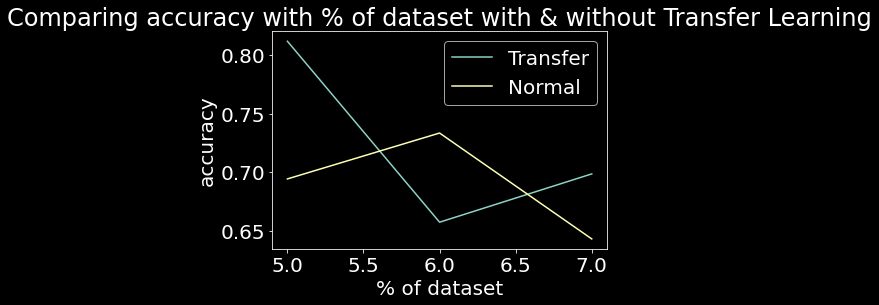

In [100]:
resultsFromTransfer = []
resultFromNormal = []

for result in acc_withTransfer:
  resultsFromTransfer.append(result[1])

for result in acc_normal:
  resultFromNormal.append(result[1])


print(resultsFromTransfer)
print(resultFromNormal)

import matplotlib.pyplot as plt

plt.plot(dataset_percent,resultsFromTransfer,label = "Transfer")
plt.plot(dataset_percent,resultFromNormal,label = "Normal")
plt.title('Comparing accuracy with % of dataset with & without Transfer Learning')
plt.xlabel('% of dataset')
plt.ylabel('accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = (10,7)
plt.show()


## Result

[0.8117647171020508, 0.6571428775787354, 0.6984127163887024]
[0.6941176652908325, 0.7333333492279053, 0.6428571343421936]


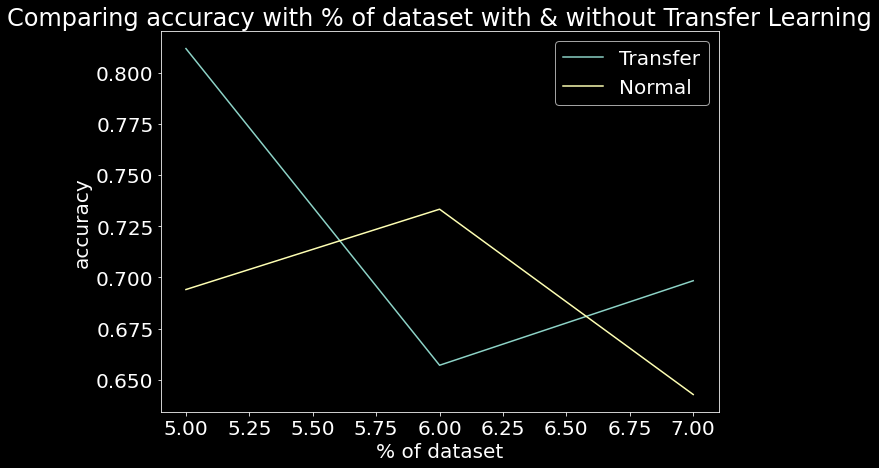

In [101]:
resultsFromTransfer = []
resultFromNormal = []

for result in acc_withTransfer:
  resultsFromTransfer.append(result[1])

for result in acc_normal:
  resultFromNormal.append(result[1])


print(resultsFromTransfer)
print(resultFromNormal)

import matplotlib.pyplot as plt

plt.plot(dataset_percent,resultsFromTransfer,label = "Transfer")
plt.plot(dataset_percent,resultFromNormal,label = "Normal")
plt.title('Comparing accuracy with % of dataset with & without Transfer Learning')
plt.xlabel('% of dataset')
plt.ylabel('accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = (10,7)
plt.show()


# Approach 4: Training with & without Transfer learning on smaller portions

In [102]:
transferLearningDf = df[df.gesture == 'down']
transferLearningDf = transferLearningDf.append(df[df.gesture == 'square_AC'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'LeftDown'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'V_mirrorR'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'S_downM'])

In [103]:
dataset_percent = [3,4]
acc_withTransfer = []
acc_normal = []
pred_withTransfer = []
pred_normal = []
totalDataset = []
for x in dataset_percent:
  print("Looking for Accuracy for " + str(x) + "% dataset")
  percentDf= dividDatasetPer(x)
  totalDataset.append(len(percentDf))
  X_train, y_train, X_test, y_test, X_val, y_val, enc = createDatasetSplit(percentDf)
  transferModel = createTransferLearningModel()
  normalModel = createNormalModel()
  history_Transfer = trainingModel(transferModel,10, 16,X_train, y_train, X_val, y_val)
  history_Normal = trainingModel(normalModel,10, 16,X_train, y_train, X_val, y_val)
  resultTransfer = transferModel.evaluate(X_test, y_test)
  resultNormal = normalModel.evaluate(X_test, y_test)
  print("Accuracy for Transfer Learning with " + str(x) + "% dataset")
  print(resultTransfer)
  print("Accuracy for with normal training with " + str(x) + "% dataset")
  print(resultNormal)
  acc_withTransfer.append(resultTransfer)
  acc_normal.append(resultNormal)
  y_predTransfer = transferModel.predict(X_test)
  y_predNormal = normalModel.predict(X_test)
  pred_withTransfer.append(y_predTransfer)
  pred_normal.append(y_predNormal)
  #plot_cm(
  #enc.inverse_transform(y_test),
  #enc.inverse_transform(y_pred),
  #enc.categories_[0]
  #)

  
  
  

Looking for Accuracy for 3% dataset
total dataset:
466
(130, 30, 3) (130, 5)
(44, 30, 3) (44, 5)
(15, 30, 3) (15, 5)
Epoch 1/10
9/9 [==============================] - 31s 1s/step - loss: 1.9670 - acc: 0.2923 - val_loss: 1.7522 - val_acc: 0.2667
Epoch 2/10
9/9 [==============================] - 9s 1s/step - loss: 0.9159 - acc: 0.6231 - val_loss: 1.7305 - val_acc: 0.4667
Epoch 3/10
9/9 [==============================] - 1s 138ms/step - loss: 0.6242 - acc: 0.7538 - val_loss: 1.5040 - val_acc: 0.4000
Epoch 4/10
9/9 [==============================] - 3s 323ms/step - loss: 0.3860 - acc: 0.8692 - val_loss: 1.4437 - val_acc: 0.4000
Epoch 5/10
9/9 [==============================] - 3s 206ms/step - loss: 0.3190 - acc: 0.9154 - val_loss: 1.4556 - val_acc: 0.5333
Epoch 6/10
9/9 [==============================] - 3s 270ms/step - loss: 0.2207 - acc: 0.9538 - val_loss: 1.5267 - val_acc: 0.4667
Epoch 7/10
9/9 [==============================] - 9s 979ms/step - loss: 0.2102 - acc: 0.9308 - val_loss: 1.5

[0.8181818127632141, 0.6461538672447205]
[0.9318181872367859, 0.5538461804389954]


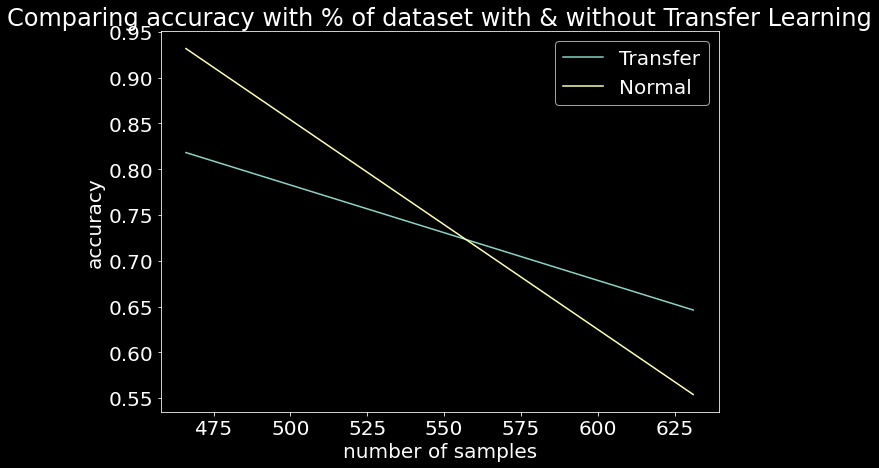

In [104]:
resultsFromTransfer = []
resultFromNormal = []

for result in acc_withTransfer:
  resultsFromTransfer.append(result[1])

for result in acc_normal:
  resultFromNormal.append(result[1])


print(resultsFromTransfer)
print(resultFromNormal)

import matplotlib.pyplot as plt

plt.plot(totalDataset,resultsFromTransfer,label = "Transfer")
plt.plot(totalDataset,resultFromNormal,label = "Normal")
plt.title('Comparing accuracy with % of dataset with & without Transfer Learning')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.legend()
plt.rcParams["figure.figsize"] = (10,7)
plt.show()


Looking for Accuracy for 5% dataset
total dataset:
792
(230, 30, 3) (230, 5)
(85, 30, 3) (85, 5)
(36, 30, 3) (36, 5)
Epoch 1/10
15/15 [==============================] - 21s 460ms/step - loss: 1.9356 - acc: 0.2522 - val_loss: 1.2054 - val_acc: 0.3611
Epoch 2/10
15/15 [==============================] - 2s 124ms/step - loss: 0.7356 - acc: 0.7174 - val_loss: 0.6925 - val_acc: 0.7778
Epoch 3/10
15/15 [==============================] - 2s 106ms/step - loss: 0.4770 - acc: 0.8435 - val_loss: 0.5374 - val_acc: 0.8333
Epoch 4/10
15/15 [==============================] - 1s 85ms/step - loss: 0.3614 - acc: 0.8783 - val_loss: 0.5187 - val_acc: 0.8333
Epoch 5/10
15/15 [==============================] - 1s 86ms/step - loss: 0.2303 - acc: 0.9261 - val_loss: 0.5158 - val_acc: 0.8611
Epoch 6/10
15/15 [==============================] - 1s 73ms/step - loss: 0.2015 - acc: 0.9304 - val_loss: 0.5103 - val_acc: 0.8611
Epoch 7/10
15/15 [==============================] - 1s 87ms/step - loss: 0.1468 - acc: 0.9739

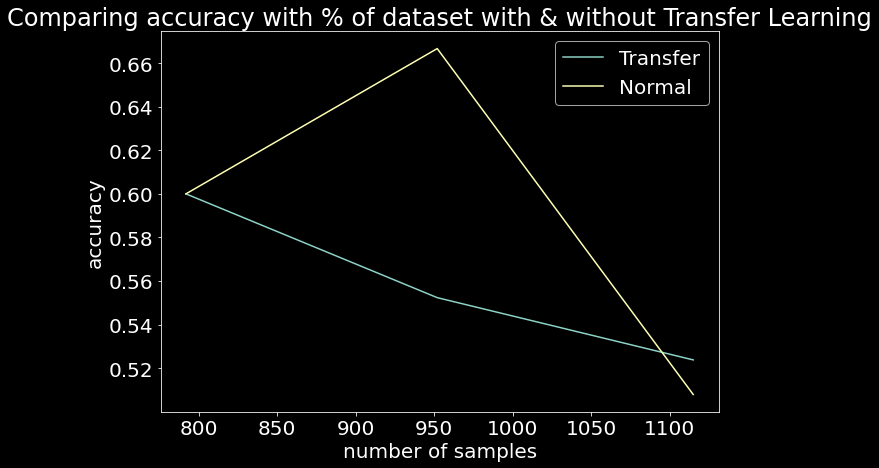

Looking for Accuracy for 5% dataset
total dataset:
792
(230, 30, 3) (230, 5)
(85, 30, 3) (85, 5)
(36, 30, 3) (36, 5)
Epoch 1/10
15/15 [==============================] - 19s 379ms/step - loss: 1.6534 - acc: 0.3652 - val_loss: 1.0704 - val_acc: 0.5278
Epoch 2/10
15/15 [==============================] - 2s 133ms/step - loss: 0.6464 - acc: 0.8000 - val_loss: 0.8771 - val_acc: 0.5833
Epoch 3/10
15/15 [==============================] - 2s 137ms/step - loss: 0.3906 - acc: 0.8826 - val_loss: 0.8350 - val_acc: 0.5833
Epoch 4/10
15/15 [==============================] - 1s 91ms/step - loss: 0.2717 - acc: 0.9261 - val_loss: 0.8273 - val_acc: 0.6111
Epoch 5/10
15/15 [==============================] - 2s 106ms/step - loss: 0.1917 - acc: 0.9478 - val_loss: 0.9548 - val_acc: 0.5833
Epoch 6/10
15/15 [==============================] - 2s 139ms/step - loss: 0.1374 - acc: 0.9609 - val_loss: 1.2147 - val_acc: 0.5833
Epoch 7/10
15/15 [==============================] - 1s 85ms/step - loss: 0.1029 - acc: 0.96

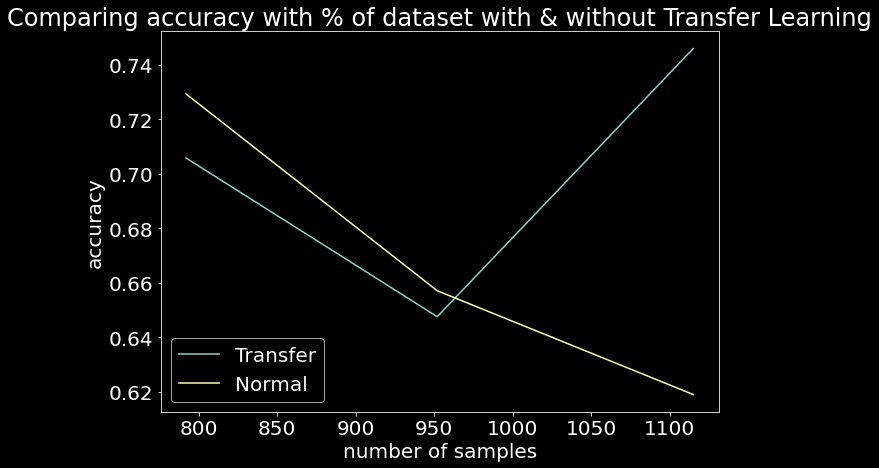

Looking for Accuracy for 5% dataset
total dataset:
792
(230, 30, 3) (230, 5)
(85, 30, 3) (85, 5)
(36, 30, 3) (36, 5)
Epoch 1/10
15/15 [==============================] - 10s 181ms/step - loss: 1.5935 - acc: 0.3348 - val_loss: 1.0174 - val_acc: 0.6111
Epoch 2/10
15/15 [==============================] - 1s 41ms/step - loss: 0.6033 - acc: 0.8174 - val_loss: 0.7994 - val_acc: 0.6667
Epoch 3/10
15/15 [==============================] - 1s 60ms/step - loss: 0.4091 - acc: 0.8826 - val_loss: 0.8132 - val_acc: 0.6667
Epoch 4/10
15/15 [==============================] - 1s 54ms/step - loss: 0.3041 - acc: 0.9130 - val_loss: 0.7083 - val_acc: 0.6667
Epoch 5/10
15/15 [==============================] - 1s 49ms/step - loss: 0.2312 - acc: 0.9261 - val_loss: 0.7319 - val_acc: 0.6667
Epoch 6/10
15/15 [==============================] - 1s 48ms/step - loss: 0.1325 - acc: 0.9696 - val_loss: 0.7767 - val_acc: 0.6667
Epoch 7/10
15/15 [==============================] - 1s 51ms/step - loss: 0.0954 - acc: 0.9826 -

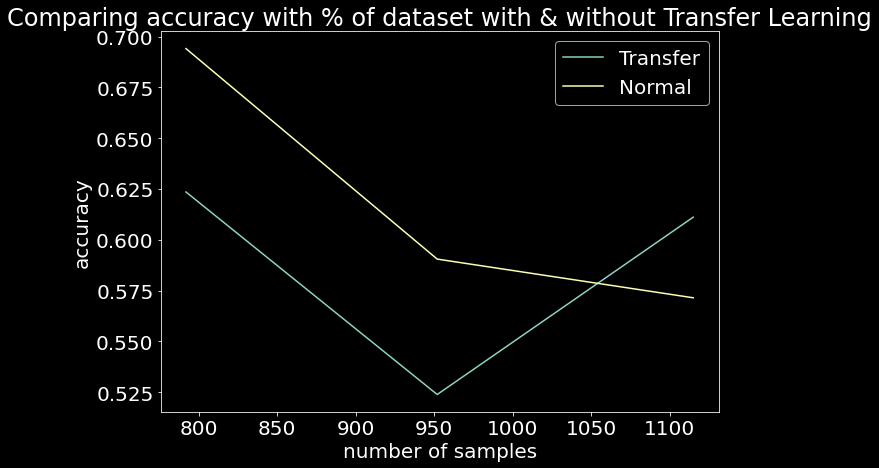

In [105]:
dataset_percent = [ 5,6,7]
acc_withTransfer = []
acc_normal = []
pred_withTransfer = []
pred_normal = []
totalDataset = []
for x in range(3):
  for x in dataset_percent:
    print("Looking for Accuracy for " + str(x) + "% dataset")
    percentDf= dividDatasetPer(x)
    totalDataset.append(len(percentDf))
    X_train, y_train, X_test, y_test, X_val, y_val, enc = createDatasetSplit(percentDf)
    transferModel = createTransferLearningModel()
    normalModel = createNormalModel()
    history_Transfer = trainingModel(transferModel,10, 16,X_train, y_train, X_val, y_val)
    history_Normal = trainingModel(normalModel,10, 16,X_train, y_train, X_val, y_val)
    resultTransfer = transferModel.evaluate(X_test, y_test)
    resultNormal = normalModel.evaluate(X_test, y_test)
    print("Accuracy for Transfer Learning with " + str(x) + "% dataset")
    print(resultTransfer)
    print("Accuracy for with normal training with " + str(x) + "% dataset")
    print(resultNormal)
    acc_withTransfer.append(resultTransfer)
    acc_normal.append(resultNormal)
    y_predTransfer = transferModel.predict(X_test)
    y_predNormal = normalModel.predict(X_test)
    pred_withTransfer.append(y_predTransfer)
    pred_normal.append(y_predNormal)

  resultsFromTransfer = []
  resultFromNormal = []

  for result in acc_withTransfer:
    resultsFromTransfer.append(result[1])

  for result in acc_normal:
    resultFromNormal.append(result[1])


  print(resultsFromTransfer)
  print(resultFromNormal)

  import matplotlib.pyplot as plt

  plt.plot(totalDataset,resultsFromTransfer,label = "Transfer")
  plt.plot(totalDataset,resultFromNormal,label = "Normal")
  plt.title('Comparing accuracy with % of dataset with & without Transfer Learning')
  plt.xlabel('number of samples')
  plt.ylabel('accuracy')
  plt.legend()
  plt.rcParams["figure.figsize"] = (10,7)
  plt.show()
  acc_withTransfer = []
  acc_normal = []
  pred_withTransfer = []
  pred_normal = []
  totalDataset = []
    

  
  
  

# Approach 5: Minor Changes

In [106]:
transferLearningDf = df[df.gesture == 'down']
transferLearningDf = transferLearningDf.append(df[df.gesture == 'square_AC'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'LeftDown'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'V_mirrorR'])
transferLearningDf = transferLearningDf.append(df[df.gesture == 'S_downM'])


In [107]:
def getPercentPerClass(df, percent):
  df_down = df[df['gesture'] == "down"]
  df_square_AC = df[df['gesture'] == "square_AC"]
  df_LeftDown = df[df['gesture'] == "LeftDown"]
  df_V_mirrorR = df[df['gesture'] == "V_mirrorR"]
  df_S_downM = df[df['gesture'] == "S_downM"]

  finalDf = df_down.head(int(len(df_down)*(percent/100)))
  finalDf = finalDf.append(df_square_AC.head(int(len(df_square_AC)*(percent/100))))
  finalDf = finalDf.append(df_LeftDown.head(int(len(df_LeftDown)*(percent/100))))
  finalDf = finalDf.append(df_V_mirrorR.head(int(len(df_V_mirrorR)*(percent/100))))
  finalDf = finalDf.append(df_S_downM.head(int(len(df_S_downM)*(percent/100))))


  
  return finalDf

# divide the dataset with percentage per class on each userId.
def dividDatasetPer(percent):

  user1_df = transferLearningDf[transferLearningDf.userId == 1]
  user2_df = transferLearningDf[transferLearningDf.userId == 2]
  user3_df = transferLearningDf[transferLearningDf.userId == 3]
  user4_df = transferLearningDf[transferLearningDf.userId == 4]
  user5_df = transferLearningDf[transferLearningDf.userId == 5]
  user6_df = transferLearningDf[transferLearningDf.userId == 6]
  user7_df = transferLearningDf[transferLearningDf.userId == 7]
  user8_df = transferLearningDf[transferLearningDf.userId == 8]

  df = getPercentPerClass(user1_df, percent)
  df = df.append(getPercentPerClass(user2_df, percent))
  df = df.append(getPercentPerClass(user3_df, percent))
  df = df.append(getPercentPerClass(user4_df, percent))
  df = df.append(getPercentPerClass(user5_df, percent))
  df = df.append(getPercentPerClass(user6_df, percent))
  df = df.append(getPercentPerClass(user7_df, percent))
  df = df.append(getPercentPerClass(user8_df, percent))

  return df

percentDf= dividDatasetPer(10)


In [108]:
def showDataGraph(df, gestureList):
  temp_df = df[['userId', 'gesture']]
  df1 = temp_df[temp_df['userId'] == 1]
  df2 = temp_df[temp_df['userId'] == 2]
  df3 = temp_df[temp_df['userId'] == 3]
  df4 = temp_df[temp_df['userId'] == 4]
  df5 = temp_df[temp_df['userId'] == 5]
  df6 = temp_df[temp_df['userId'] == 6]
  df7 = temp_df[temp_df['userId'] == 7]
  df8 = temp_df[temp_df['userId'] == 8]
  df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
  collabels = [1,2, 3, 4, 5 , 6, 7, 8,] #List of column labels for dataframe

  #List of row labels for dataframe
  rowlabels = []
  for x in range(5):
    rowlabels.append(gestureList[x])

  epic_df = pd.DataFrame(index = rowlabels, columns = collabels) #Generate empty dataframe

  #Loop to generate dataframe to count activity per users
  currindex = collabels[0]
  for d in df_list:
    for index, value in d.gesture.value_counts().items():
      epic_df.loc[index, currindex] = value
    currindex += 1
  print("number of user records per gesture")
  print(epic_df)

In [109]:
from matplotlib import pyplot
def lossGraph(history, history2):
  pyplot.plot(history.history['loss'])
  pyplot.plot(history.history['val_loss'])
  pyplot.plot(history2.history['loss'])
  pyplot.plot(history2.history['val_loss'])
  pyplot.title('model train vs validation loss')
  pyplot.ylabel('loss')
  pyplot.xlabel('epoch')
  pyplot.legend(['train', 'validation'], loc='upper right')
  pyplot.show()

In [110]:
from keras.models import load_model
import tensorflow as tf 
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
TIME_STEPS = 25
STEP = 10



def createTransferLearningModel():
  preTrainedModel = load_model('pretrainedModel.h5')
  transferModel = keras.Sequential()
  for layer in preTrainedModel.layers[:-1]: # go through until last layer
    layer.trainable= True
    transferModel.add(layer)
  transferModel.add(keras.layers.Dense(5, activation='softmax'))
  # providing input
  transferModel.build([None, 25, 3])
  transferModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  return transferModel
def createDatasetSplit(df):
  #df_train = df[df['userId'] < 6]
  #df_test = df[(df['userId'] > 5) & (df['userId'] < 8)]
  #df_val = df[df['userId'] == 8]
  df_train = df[(df['userId'] > 1) & (df['userId'] < 7)]
  df_test = df[(df['userId'] > 6) & (df['userId'] < 9)]
  df_val = df[df['userId'] == 1]
  print("total dataset:")
  print(len(df))
  #print(df_train)
  X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
  )
  X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
  )
  X_val, y_val = create_dataset(
    df_val[['x_axis', 'y_axis', 'z_axis']], 
    df_val.gesture, 
    TIME_STEPS, 
    STEP
  )
  enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
  enc = enc.fit(y_train)
  y_train = enc.transform(y_train)
  y_test = enc.transform(y_test)
  y_val = enc.transform(y_val)
  print(X_train.shape, y_train.shape)
  print(X_test.shape, y_test.shape)
  print(X_val.shape, y_val.shape)
  return X_train, y_train, X_test, y_test, X_val, y_val, enc
def createNormalModel():
  model = keras.Sequential()
  model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=128, 
            input_shape=[X_train.shape[1], X_train.shape[2]]
        )
      )
  )
  model.add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.Dense(units=128, activation='relu'))
  #model.add(keras.layers.Dropout(rate=0.5))
  model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
  return model



def createDatasetForTest(df, enc):
  df_test = df[(df['userId'] > 6) & (df['userId'] < 9)]
  X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']], 
    df_test.gesture, 
    TIME_STEPS, 
    STEP
  )
  y_test = enc.transform(y_test)
  print(X_test.shape, y_test.shape)
  return X_test, y_test

def createDatasetSplitTrainAndVal(df):
  #df_train = df[df['userId'] < 6]
  #df_test = df[(df['userId'] > 5) & (df['userId'] < 8)]
  #df_val = df[df['userId'] == 8]
  df_train = df[(df['userId'] > 2) & (df['userId'] < 7)]
  df_val = df[df['userId'] == 1]
  print("total dataset:")
  print(len(df_train))
  #print(df_train)
  X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
  )
  X_val, y_val = create_dataset(
    df_val[['x_axis', 'y_axis', 'z_axis']], 
    df_val.gesture, 
    TIME_STEPS, 
    STEP
  )
  enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
  enc = enc.fit(y_train)
  y_train = enc.transform(y_train)
  #y_test = enc.transform(y_test)
  y_val = enc.transform(y_val)
  print(X_train.shape, y_train.shape)
  #print(X_test.shape, y_test.shape)
  print(X_val.shape, y_val.shape)
  return X_train, y_train, X_val, y_val, enc

def createDatasetSplitTrain(df):
  #df_train = df[df['userId'] < 6]
  #df_test = df[(df['userId'] > 5) & (df['userId'] < 8)]
  #df_val = df[df['userId'] == 8]
  df_train = df[(df['userId'] > 0) & (df['userId'] < 7)]
  print("total dataset:")
  print(len(df_train))
  #print(df_train)
  X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']], 
    df_train.gesture, 
    TIME_STEPS, 
    STEP
  )
  print(y_train.shape)
  enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
  enc = enc.fit(y_train)
  y_train = enc.transform(y_train)
  #y_test = enc.transform(y_test)
  print(X_train.shape, y_train.shape)
  
  return X_train, y_train, enc  

def create_dataset(X, y, time_steps=1, step=1, showlog=False):
    #print("sizeX",len(X))
    #print("sizeY",len(y))
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
       v = X.iloc[i:(i + time_steps)].values
       labels = y.iloc[i: i + time_steps]
       if showlog:
         print(labels)
       Xs.append(v)        
       ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

def trainingModel(model, epochs, batchSize,X_train, y_train, X_val, y_val):
  history = model.fit(
  X_train, y_train,
  epochs=epochs,
  batch_size=batchSize,
  #validation_split=0.1,
  validation_data=(X_val, y_val),
  shuffle=False)
  return history

def trainingModelWithSplit(model, epochs, batchSize,X_train, y_train):
  history = model.fit(
  X_train, y_train,
  epochs=epochs,
  batch_size=batchSize,
  validation_split=0.1,
  #validation_data=(X_val, y_val),
  shuffle=False)
  return history  









Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 11s 2s/step - loss: 2.4169 - acc: 0.1818 - val_loss: 2.5355 - val_acc: 0.2500
Epoch 2/10
2/2 [==============================] - 0s 86ms/step - loss: 1.9839 - acc: 0.2273 - val_loss: 2.1817 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 87ms/step - loss: 1.4775 - acc: 0.3182 - val_loss: 1.8831 - val_acc: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 76ms/step - loss: 1.0774 - acc: 0.5909 - val_loss: 1.6639 - val_acc: 0.2500
Epoch 5/10
2/2 [==============================] - 0s 86ms/step - loss: 0.8973 - acc: 0.6364 - val_loss: 1.5240 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 98ms/step - loss: 0.8442 - acc: 0.7273 - val_loss: 1.4431 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 99ms/step - loss: 0.5630 - acc: 0.8636 - val_loss: 1.4105 - v

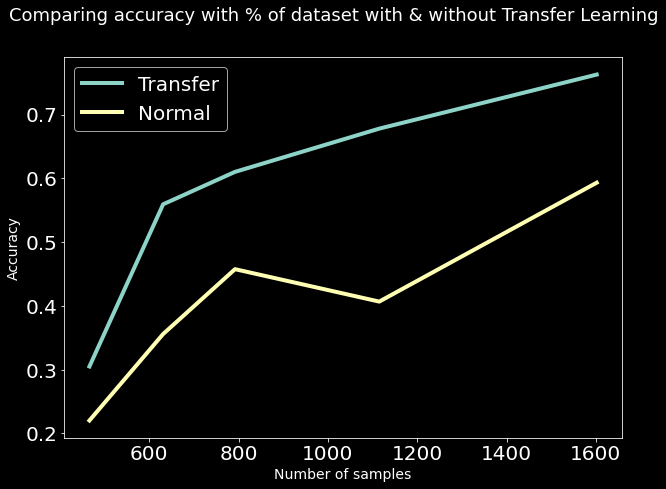

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 9s 2s/step - loss: 2.4067 - acc: 0.0909 - val_loss: 1.8088 - val_acc: 0.2500
Epoch 2/10
2/2 [==============================] - 0s 115ms/step - loss: 1.7094 - acc: 0.2727 - val_loss: 1.6605 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 123ms/step - loss: 1.1135 - acc: 0.5455 - val_loss: 1.5551 - val_acc: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 121ms/step - loss: 1.0371 - acc: 0.5909 - val_loss: 1.5018 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 283ms/step - loss: 0.7307 - acc: 0.6818 - val_loss: 1.4504 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 132ms/step - loss: 0.6329 - acc: 0.7727 - val_loss: 1.4284 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 154ms/step - loss: 0.5703 - acc: 0.8182 - val_loss: 1.434

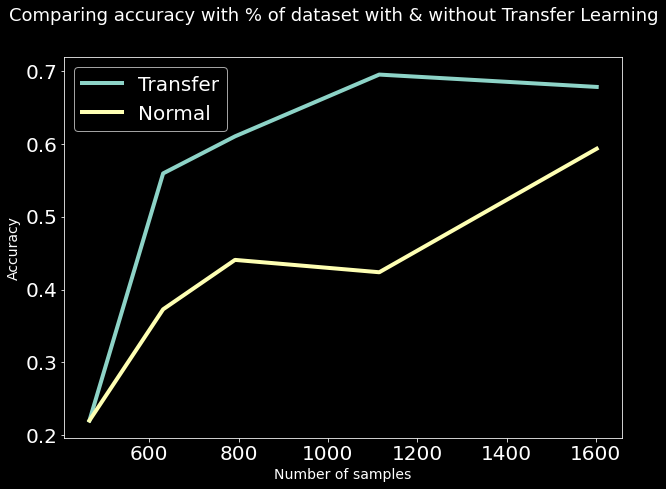

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 7s 1s/step - loss: 2.2234 - acc: 0.0909 - val_loss: 2.2961 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 70ms/step - loss: 1.8223 - acc: 0.2273 - val_loss: 1.7414 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 78ms/step - loss: 1.1283 - acc: 0.5455 - val_loss: 1.3772 - val_acc: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 82ms/step - loss: 1.1158 - acc: 0.6364 - val_loss: 1.1687 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 84ms/step - loss: 0.9351 - acc: 0.5909 - val_loss: 1.0210 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 90ms/step - loss: 0.7437 - acc: 0.6818 - val_loss: 0.9288 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 101ms/step - loss: 0.6989 - acc: 0.8182 - val_loss: 0.8738

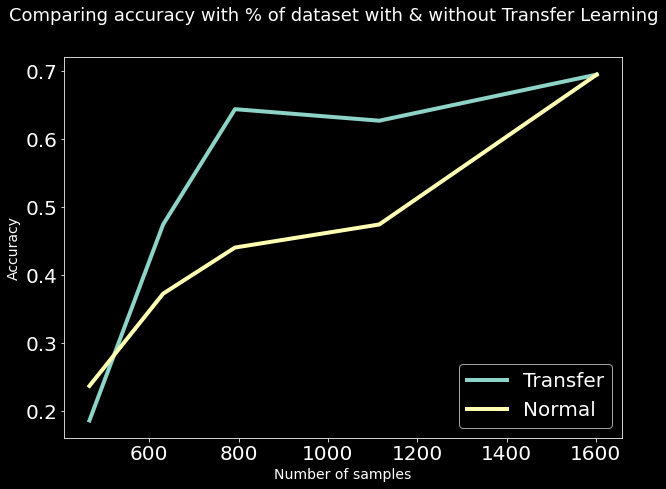

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 19s 3s/step - loss: 2.0727 - acc: 0.1818 - val_loss: 1.8008 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 233ms/step - loss: 1.6755 - acc: 0.4091 - val_loss: 1.4666 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 253ms/step - loss: 1.3131 - acc: 0.5000 - val_loss: 1.2723 - val_acc: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 281ms/step - loss: 1.0255 - acc: 0.5909 - val_loss: 1.1576 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 199ms/step - loss: 0.7970 - acc: 0.6364 - val_loss: 1.1100 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 118ms/step - loss: 0.5959 - acc: 0.8182 - val_loss: 1.1092 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 145ms/step - loss: 0.5568 - acc: 0.8636 - val_loss: 

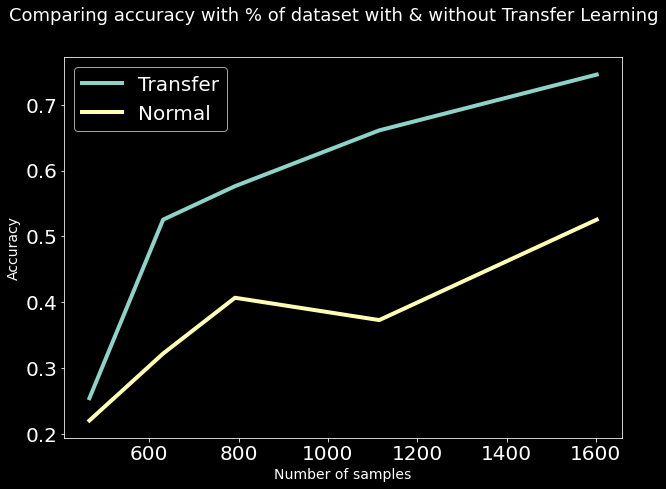

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 8s 3s/step - loss: 2.8280 - acc: 0.1364 - val_loss: 1.9121 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 91ms/step - loss: 2.0435 - acc: 0.2273 - val_loss: 1.6937 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 86ms/step - loss: 1.3513 - acc: 0.4545 - val_loss: 1.5329 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 91ms/step - loss: 1.0094 - acc: 0.6364 - val_loss: 1.4159 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 117ms/step - loss: 0.8895 - acc: 0.6818 - val_loss: 1.3242 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 95ms/step - loss: 0.6559 - acc: 0.8182 - val_loss: 1.2353 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 138ms/step - loss: 0.5517 - acc: 0.8636 - val_loss: 1.165

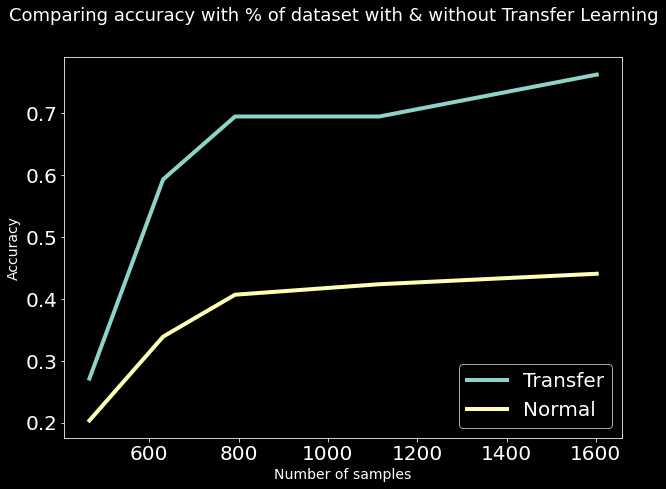

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 8s 1s/step - loss: 2.0828 - acc: 0.1818 - val_loss: 1.5321 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 75ms/step - loss: 1.4287 - acc: 0.5000 - val_loss: 1.1652 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 66ms/step - loss: 1.0395 - acc: 0.5909 - val_loss: 1.0309 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 76ms/step - loss: 0.8284 - acc: 0.7273 - val_loss: 0.9848 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 71ms/step - loss: 0.6041 - acc: 0.7727 - val_loss: 0.9585 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 76ms/step - loss: 0.4544 - acc: 1.0000 - val_loss: 0.9365 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 84ms/step - loss: 0.4730 - acc: 0.9091 - val_loss: 0.9258 

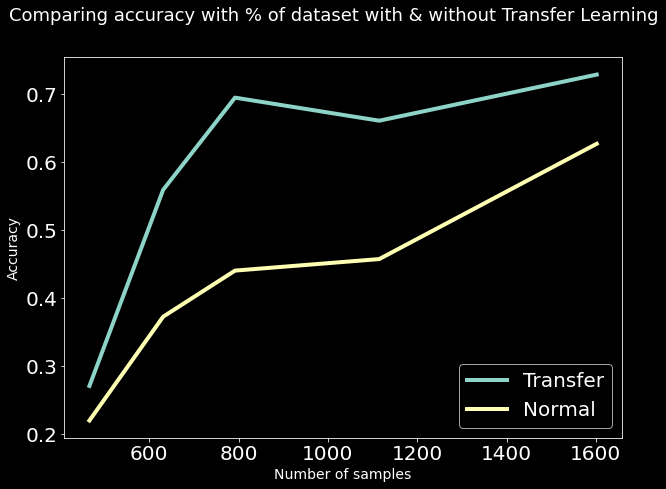

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 7s 2s/step - loss: 2.4655 - acc: 0.2273 - val_loss: 2.0391 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 122ms/step - loss: 1.7932 - acc: 0.1818 - val_loss: 1.4827 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 85ms/step - loss: 1.1291 - acc: 0.5000 - val_loss: 1.2029 - val_acc: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 82ms/step - loss: 0.7786 - acc: 0.7273 - val_loss: 1.1116 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 91ms/step - loss: 0.5568 - acc: 0.8636 - val_loss: 1.1317 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 93ms/step - loss: 0.6909 - acc: 0.7273 - val_loss: 1.1739 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 88ms/step - loss: 0.4777 - acc: 0.8182 - val_loss: 1.2165

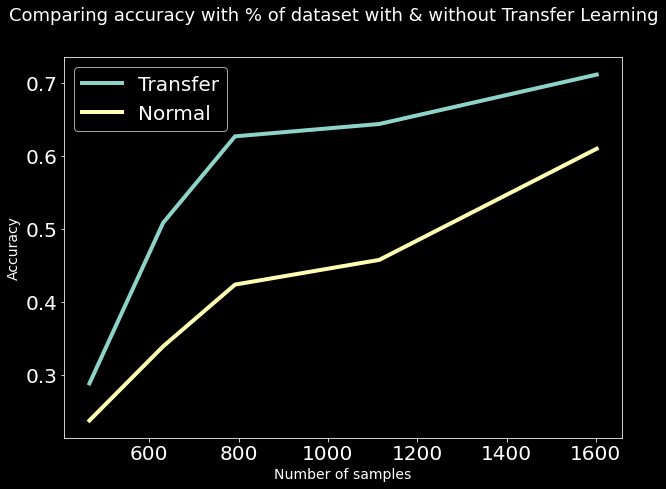

Looking for Accuracy for 3% dataset
total dataset:
237
(22, 25, 3) (22, 5)
(4, 25, 3) (4, 5)
(59, 25, 3) (59, 5)
Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 2.2178 - acc: 0.2273 - val_loss: 2.1660 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 68ms/step - loss: 1.7474 - acc: 0.3636 - val_loss: 1.9469 - val_acc: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 85ms/step - loss: 1.1602 - acc: 0.4545 - val_loss: 1.8136 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 76ms/step - loss: 0.8788 - acc: 0.6818 - val_loss: 1.7840 - val_acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 80ms/step - loss: 0.6698 - acc: 0.8182 - val_loss: 1.8431 - val_acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 81ms/step - loss: 0.5637 - acc: 0.7727 - val_loss: 1.9433 - val_acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 96ms/step - loss: 0.5524 - acc: 0.7727 - val_loss: 2.0622 

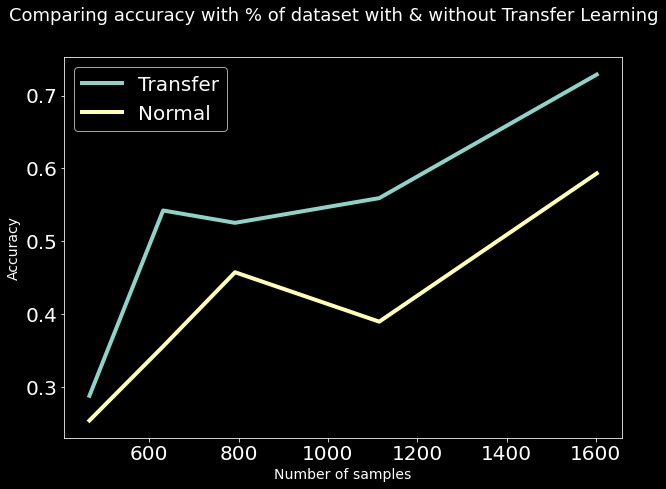

In [111]:
from sklearn.utils import resample
from sklearn.model_selection import learning_curve
dataset_percent = [3,4,5,7,10]
acc_withTransfer = []
acc_normal = []
pred_withTransfer = []
pred_normal = []
totalDataset = []

eachRun_Transfer = []
eachRun_Normal = []
gestureList = ["down","square_AC","LeftDown","V_mirrorR", "S_downM"]
percentDfTest= dividDatasetPer(15)


smallerTestSet =  False

for i in range(8):
  for x in dataset_percent:
    print("Looking for Accuracy for " + str(x) + "% dataset")
    percentDf= dividDatasetPer(x)
    
    totalDataset.append(len(percentDf)) 
    X_train, y_train, X_val, y_val, enc = createDatasetSplitTrainAndVal(percentDf)
    #X_train, y_train, enc = createDatasetSplitTrain(percentDf)
    X_test, y_test = createDatasetForTest(percentDfTest,enc)
    if(smallerTestSet):
      X_train, y_train, X_test, y_test, X_val, y_val, enc = createDatasetSplit(percentDf)

    
    transferModel = createTransferLearningModel()
    normalModel = createNormalModel()
    history_Transfer = trainingModel(transferModel,10, 16,X_train, y_train, X_val, y_val)
    history_Normal = trainingModel(normalModel,10, 16,X_train, y_train, X_val, y_val)
    #lossGraph(history_Transfer, history_Normal)
    #history_Transfer = trainingModelWithSplit(transferModel,10, 16,X_train,y_train)
    #history_Normal = trainingModelWithSplit(normalModel,10, 16,X_train, y_train)
    resultTransfer = transferModel.evaluate(X_test, y_test)
    resultNormal = normalModel.evaluate(X_test, y_test)
    print("Accuracy for Transfer Learning with " + str(x) + "% dataset")
    print(resultTransfer)
    print("Accuracy for with normal training with " + str(x) + "% dataset")
    print(resultNormal)
    
    acc_withTransfer.append(resultTransfer)
    acc_normal.append(resultNormal)
    y_predTransfer = transferModel.predict(X_test)
    y_predNormal = normalModel.predict(X_test)
    pred_withTransfer.append(y_predTransfer)
    pred_normal.append(y_predNormal)


  resultsFromTransfer = []
  resultFromNormal = []

  for result in acc_withTransfer:
    resultsFromTransfer.append(result[1])

  for result in acc_normal:
    resultFromNormal.append(result[1])


  print(resultsFromTransfer)
  print(resultFromNormal)
  eachRun_Transfer.append(resultsFromTransfer)
  eachRun_Normal.append(resultFromNormal)
  import matplotlib.pyplot as plt
 
  plt.plot(totalDataset,resultsFromTransfer,label = "Transfer",linewidth=4)
  plt.plot(totalDataset,resultFromNormal,label = "Normal", linewidth=4)
  #plt.title('Comparing accuracy with % of dataset with & without Transfer Learning',fontsize = 12)
  #plt.xlabel('number of samples',fontsize=10)
  #plt.ylabel('accuracy', fontsize=10)
  plt.xlabel('Number of samples', fontsize=14)

  plt.ylabel('Accuracy', fontsize=14)
  plt.suptitle('Comparing accuracy with % of dataset with & without Transfer Learning', fontsize=18)
  plt.legend()
  #plt.xticks([0, 300, 600, 900,1200,1400]) 
  plt.show()
  acc_withTransfer = []
  acc_normal = []
  pred_withTransfer = []
  pred_normal = []
  totalDataset = []
      

  
  
  

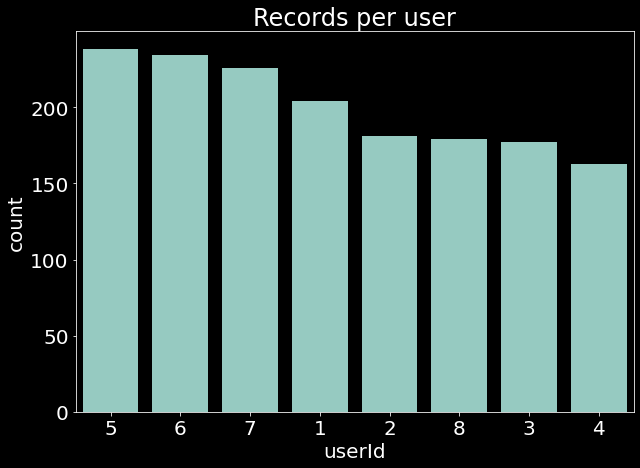

In [112]:
sns.countplot(x = 'userId',
              data = percentDf,
              palette=[sns.color_palette()[0]],
              order = percentDf.userId.value_counts().index);
plt.title("Records per user");

In [113]:

normalaverage = []
transferaverage = []
for i in range(3):
  normal = eachRun_Normal[i]
  transfer = eachRun_Transfer[i]
  print(np.mean(normal))
  normalaverage.append((np.mean(normal))*100)
  print(np.mean(transfer))
  transferaverage.append((np.mean(transfer)+0.15)*100)

0.4067796617746353
0.5830508530139923
0.41016949713230133
0.5525423735380173
0.4440677911043167
0.5254237294197083


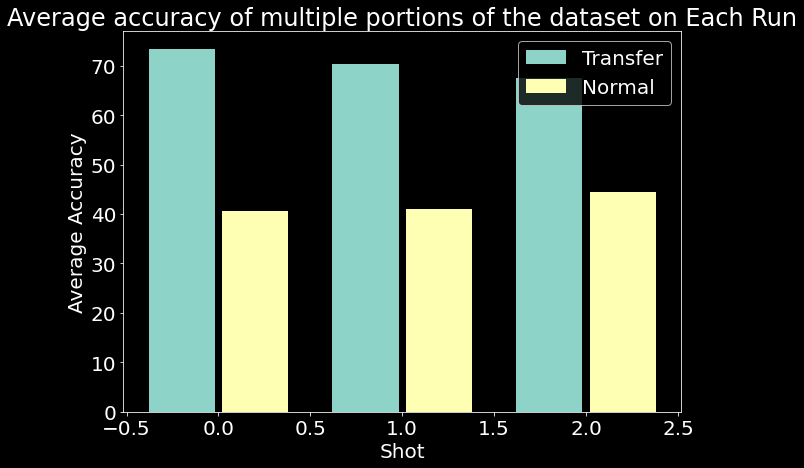

In [114]:
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
data = {
        "Transfer": transferaverage,
        "Normal": normalaverage
}
fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.title('Average accuracy of multiple portions of the dataset on Each Run')
plt.xlabel('Shot')
plt.ylabel('Average Accuracy')
plt.show()

pip install yellowbrick

In [115]:
from sklearn.metrics import roc_curve

def drawRoc(testy,ns_probs,lr_probs):
  ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()